# Computer Vision Project on Bus Route Classification for Visually Impaired People.

# Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
import sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Implemented this Project on Google Colab, stared with mounting the data in drive and then unzipping the mounted folder.

In [ ]:
!unzip /content/drive/MyDrive/Dataset_Final.zip

In [ ]:
<!-- Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Bus 2/165.jpg   
  inflating: Dataset/Bus 2/166.jpg   
  inflating: Dataset/Bus 2/167.jpg   
  inflating: Dataset/Bus 2/168.png   
  inflating: Dataset/Bus 2/169.jpg   
  inflating: Dataset/Bus 2/1699.jpg  
  inflating: Dataset/Bus 2/17.jpg    
  inflating: Dataset/Bus 2/170.jpg   
  inflating: Dataset/Bus 2/1700.jpg  
  inflating: Dataset/Bus 2/171.jpg   
  inflating: Dataset/Bus 2/172.jpg   
  inflating: Dataset/Bus 2/173.jpg   
  inflating: Dataset/Bus 2/174.jpg   
  inflating: Dataset/Bus 2/175.jpg   
  inflating: Dataset/Bus 2/176.jpg   
  inflating: Dataset/Bus 2/177.jpg   
  inflating: Dataset/Bus 2/178.jpg   
  inflating: Dataset/Bus 2/179.jpg   
  inflating: Dataset/Bus 2/18.jpg    
  inflating: Dataset/Bus 2/180.jpg   
  inflating: Dataset/Bus 2/181.jpg   
  inflating: Dataset/Bus 2/182.jpg   
  inflating: Dataset/Bus 2/183.jpg   
  inflating: Dataset/Bus 2/184.jpg   
  inflating: Dataset/Bus 2/185.jpg   
  inflating: Dataset/Bus 2/186.jpg   
  inflating: Dataset/Bus 2/187.jpg   
  inflating: Dataset/Bus 2/188.jpg   
  inflating: Dataset/Bus 2/189.jpg   
  inflating: Dataset/Bus 2/19.jpg    
  inflating: Dataset/Bus 2/190.jpg   
  inflating: Dataset/Bus 2/191.jpg   
  inflating: Dataset/Bus 2/192.jpg   
  inflating: Dataset/Bus 2/193.jpg   
  inflating: Dataset/Bus 2/194.jpg   
  inflating: Dataset/Bus 2/195.jpg   
  inflating: Dataset/Bus 2/196.jpg   
  inflating: Dataset/Bus 2/197.jpg   
  inflating: Dataset/Bus 2/198.jpg   
  inflating: Dataset/Bus 2/199.jpg   
  inflating: Dataset/Bus 2/2.jpg     
  inflating: Dataset/Bus 2/20.jpg    
  inflating: Dataset/Bus 2/200.JPG   
  inflating: Dataset/Bus 2/201.jpg   
  inflating: Dataset/Bus 2/202.jpg   
  inflating: Dataset/Bus 2/203.jpg   
  inflating: Dataset/Bus 2/204.png   
  inflating: Dataset/Bus 2/205.jpg   
  inflating: Dataset/Bus 2/206.jpg   
  inflating: Dataset/Bus 2/207.jpg   
  inflating: Dataset/Bus 2/208.jpg   
  inflating: Dataset/Bus 2/209.jpg   
  inflating: Dataset/Bus 2/21.jpg    
  inflating: Dataset/Bus 2/210.jpg   
  inflating: Dataset/Bus 2/211.jpg   
  inflating: Dataset/Bus 2/212.jpg   
  inflating: Dataset/Bus 2/213.jpg   
  inflating: Dataset/Bus 2/214.jpg   
  inflating: Dataset/Bus 2/215.jpg   
  inflating: Dataset/Bus 2/216.jpg   
  inflating: Dataset/Bus 2/217.jpg   
  inflating: Dataset/Bus 2/218.jpg   
  inflating: Dataset/Bus 2/219.jpg   
  inflating: Dataset/Bus 2/22.jpg    
  inflating: Dataset/Bus 2/220.jpg   
  inflating: Dataset/Bus 2/221.jpeg  
  inflating: Dataset/Bus 2/222.jpg   
  inflating: Dataset/Bus 2/223.jpg   
  inflating: Dataset/Bus 2/224.jpeg  
  inflating: Dataset/Bus 2/225.png   
  inflating: Dataset/Bus 2/226.jpg   
  inflating: Dataset/Bus 2/227.jpg   
  inflating: Dataset/Bus 2/228.jpg   
  inflating: Dataset/Bus 2/229.jpg   
  inflating: Dataset/Bus 2/23.jpg    
  inflating: Dataset/Bus 2/230.jpg   
  inflating: Dataset/Bus 2/231.jpeg  
  inflating: Dataset/Bus 2/232.jpg   
  inflating: Dataset/Bus 2/233.jpg   
  inflating: Dataset/Bus 2/234.jpg   
  inflating: Dataset/Bus 2/235.jpg   
  inflating: Dataset/Bus 2/236.jpg   
  inflating: Dataset/Bus 2/237.jpg   
  inflating: Dataset/Bus 2/238.jpg   
  inflating: Dataset/Bus 2/239.jpg   
  inflating: Dataset/Bus 2/24.jpg    
  inflating: Dataset/Bus 2/240.jpg   
  inflating: Dataset/Bus 2/241.jpg   
  inflating: Dataset/Bus 2/242.jpg   
  inflating: Dataset/Bus 2/243.jpg   
  inflating: Dataset/Bus 2/244.jpg   
  inflating: Dataset/Bus 2/245.jpeg  
  inflating: Dataset/Bus 2/246.jpg   
  inflating: Dataset/Bus 2/247.jpg   
  inflating: Dataset/Bus 2/248.jpg   
  inflating: Dataset/Bus 2/249.jpg   
  inflating: Dataset/Bus 2/25.jpg    
  inflating: Dataset/Bus 2/250.jpg   
  inflating: Dataset/Bus 2/251.jpg   
  inflating: Dataset/Bus 2/252.jpg   
  inflating: Dataset/Bus 2/253.jpg   
  inflating: Dataset/Bus 2/254.jpg   
  inflating: Dataset/Bus 2/255.jpg   
  inflating: Dataset/Bus 2/256.jpg   
  inflating: Dataset/Bus 2/257.jpg   
  inflating: Dataset/Bus 2/258.jpg   
  inflating: Dataset/Bus 2/259.jpg   
  inflating: Dataset/Bus 2/26.jpg    
  inflating: Dataset/Bus 2/260.jpg   
  inflating: Dataset/Bus 2/261.jpg   
  inflating: Dataset/Bus 2/262.jpg   
  inflating: Dataset/Bus 2/263.jpg   
  inflating: Dataset/Bus 2/264.jpg   
  inflating: Dataset/Bus 2/265.jpg   
  inflating: Dataset/Bus 2/266.jpg   
  inflating: Dataset/Bus 2/267.jpg   
  inflating: Dataset/Bus 2/268.jpg   
  inflating: Dataset/Bus 2/269.jpg   
  inflating: Dataset/Bus 2/27.jpg    
  inflating: Dataset/Bus 2/270.png   
  inflating: Dataset/Bus 2/271.png   
  inflating: Dataset/Bus 2/272.jpg   
  inflating: Dataset/Bus 2/273.jpg   
  inflating: Dataset/Bus 2/274.jpg   
  inflating: Dataset/Bus 2/275.png   
  inflating: Dataset/Bus 2/276.jpg   
  inflating: Dataset/Bus 2/277.jpg   
  inflating: Dataset/Bus 2/278.jpg   
  inflating: Dataset/Bus 2/279.jpg   
  inflating: Dataset/Bus 2/28.jpg    
  inflating: Dataset/Bus 2/280.jpg   
  inflating: Dataset/Bus 2/281.jpg   
  inflating: Dataset/Bus 2/282.jpg   
  inflating: Dataset/Bus 2/283.jpg   
  inflating: Dataset/Bus 2/284.jpg   
  inflating: Dataset/Bus 2/285.jpg   
  inflating: Dataset/Bus 2/286.jpg   
  inflating: Dataset/Bus 2/287.jpg   
  inflating: Dataset/Bus 2/288.jpg   
  inflating: Dataset/Bus 2/289.jpg   
  inflating: Dataset/Bus 2/29.jpg    
  inflating: Dataset/Bus 2/290.jpg   
  inflating: Dataset/Bus 2/291.JPG   
  inflating: Dataset/Bus 2/292.jpg   
  inflating: Dataset/Bus 2/293.JPG   
  inflating: Dataset/Bus 2/294.jpg   
  inflating: Dataset/Bus 2/295.jpg   
  inflating: Dataset/Bus 2/296.jpg   
  inflating: Dataset/Bus 2/297.jpg   
  inflating: Dataset/Bus 2/298.jpg   
  inflating: Dataset/Bus 2/299.jpg   
  inflating: Dataset/Bus 2/3.jpg     
  inflating: Dataset/Bus 2/30.jpg    
  inflating: Dataset/Bus 2/300.jpg   
  inflating: Dataset/Bus 2/301.jpg   
  inflating: Dataset/Bus 2/302.png   
  inflating: Dataset/Bus 2/303.jpg   
  inflating: Dataset/Bus 2/304.jpg   
  inflating: Dataset/Bus 2/305.jpg   
  inflating: Dataset/Bus 2/306.jpg   
  inflating: Dataset/Bus 2/307.jpg   
  inflating: Dataset/Bus 2/308.jpg   
  inflating: Dataset/Bus 2/309.jpg   
  inflating: Dataset/Bus 2/31.jpg    
  inflating: Dataset/Bus 2/310.png   
  inflating: Dataset/Bus 2/311.png   
  inflating: Dataset/Bus 2/312.jpg   
  inflating: Dataset/Bus 2/313.jpg   
  inflating: Dataset/Bus 2/314.jpg   
  inflating: Dataset/Bus 2/315.jpg   
  inflating: Dataset/Bus 2/316.jpg   
  inflating: Dataset/Bus 2/317.jpg   
  inflating: Dataset/Bus 2/318.jpg   
  inflating: Dataset/Bus 2/319.jpg   
  inflating: Dataset/Bus 2/32.jpg    
  inflating: Dataset/Bus 2/320.jpg   
  inflating: Dataset/Bus 2/321.jpg   
  inflating: Dataset/Bus 2/322.jpg   
  inflating: Dataset/Bus 2/323.png   
  inflating: Dataset/Bus 2/324.jpg   
  inflating: Dataset/Bus 2/325.jpg   
  inflating: Dataset/Bus 2/326.jpg   
  inflating: Dataset/Bus 2/327.jpg   
  inflating: Dataset/Bus 2/328.jpg   
  inflating: Dataset/Bus 2/329.jpg   
  inflating: Dataset/Bus 2/33.jpg    
  inflating: Dataset/Bus 2/330.jpg   
  inflating: Dataset/Bus 2/331.jpg   
  inflating: Dataset/Bus 2/332.jpg   
  inflating: Dataset/Bus 2/333.jpg   
  inflating: Dataset/Bus 2/334.jpg   
  inflating: Dataset/Bus 2/335.jpg   
  inflating: Dataset/Bus 2/336.png   
  inflating: Dataset/Bus 2/337.jpg   
  inflating: Dataset/Bus 2/338.jpg   
  inflating: Dataset/Bus 2/339.jpg   
  inflating: Dataset/Bus 2/34.jpg    
  inflating: Dataset/Bus 2/340.jpg   
  inflating: Dataset/Bus 2/341.jpg   
  inflating: Dataset/Bus 2/342.JPG   
  inflating: Dataset/Bus 2/343.jpg   
  inflating: Dataset/Bus 2/344.jpg   
  inflating: Dataset/Bus 2/345.png   
  inflating: Dataset/Bus 2/346.jpg   
  inflating: Dataset/Bus 2/347.jpg   
  inflating: Dataset/Bus 2/348.jpg   
  inflating: Dataset/Bus 2/349.jpg   
  inflating: Dataset/Bus 2/35.jpg    
  inflating: Dataset/Bus 2/350.jpg   
  inflating: Dataset/Bus 2/351.jpg   
  inflating: Dataset/Bus 2/352.jpg   
  inflating: Dataset/Bus 2/353.jpg   
  inflating: Dataset/Bus 2/354.JPG   
  inflating: Dataset/Bus 2/355.jpg   
  inflating: Dataset/Bus 2/356.JPG   
  inflating: Dataset/Bus 2/357.jpg   
  inflating: Dataset/Bus 2/358.jpg   
  inflating: Dataset/Bus 2/359.jpg   
  inflating: Dataset/Bus 2/36.png    
  inflating: Dataset/Bus 2/360.jpg   
  inflating: Dataset/Bus 2/363.jpg   
  inflating: Dataset/Bus 2/364.jpg   
  inflating: Dataset/Bus 2/365.jpg   
  inflating: Dataset/Bus 2/366.jpg   
  inflating: Dataset/Bus 2/367.jpg   
  inflating: Dataset/Bus 2/368.jpg   
  inflating: Dataset/Bus 2/369.jpg   
  inflating: Dataset/Bus 2/37.jpg    
  inflating: Dataset/Bus 2/370.jpg   
  inflating: Dataset/Bus 2/371.jpg   
  inflating: Dataset/Bus 2/372.jpg   
  inflating: Dataset/Bus 2/373.jpg   
  inflating: Dataset/Bus 2/374.jpg   
  inflating: Dataset/Bus 2/375.jpg   
  inflating: Dataset/Bus 2/376.jpg   
  inflating: Dataset/Bus 2/377.jpg   
  inflating: Dataset/Bus 2/378.jpg   
  inflating: Dataset/Bus 2/379.jpg   
  inflating: Dataset/Bus 2/38.jpg    
  inflating: Dataset/Bus 2/380.jpg   
  inflating: Dataset/Bus 2/381.jpg   
  inflating: Dataset/Bus 2/382.jpeg  
  inflating: Dataset/Bus 2/383.jpg   
  inflating: Dataset/Bus 2/384.jpg   
  inflating: Dataset/Bus 2/385.jpg   
  inflating: Dataset/Bus 2/386.jpg   
  inflating: Dataset/Bus 2/387.jpg   
  inflating: Dataset/Bus 2/388.jpg   
  inflating: Dataset/Bus 2/389.jpg   
  inflating: Dataset/Bus 2/39.jpg    
  inflating: Dataset/Bus 2/390.jpg   
  inflating: Dataset/Bus 2/391.jpg   
  inflating: Dataset/Bus 2/392.jpg   
  inflating: Dataset/Bus 2/393.jpg   
  inflating: Dataset/Bus 2/394.jpg   
  inflating: Dataset/Bus 2/395.jpg   
  inflating: Dataset/Bus 2/396.jpg   
  inflating: Dataset/Bus 2/397.jpg   
  inflating: Dataset/Bus 2/398.jpg   
  inflating: Dataset/Bus 2/399.jpg   
  inflating: Dataset/Bus 2/4.jpg     
  inflating: Dataset/Bus 2/40.jpeg   
  inflating: Dataset/Bus 2/400.jpg   
  inflating: Dataset/Bus 2/401.jpg   
  inflating: Dataset/Bus 2/402.jpg   
  inflating: Dataset/Bus 2/403.jpg   
  inflating: Dataset/Bus 2/404.jpg   
  inflating: Dataset/Bus 2/405.jpg   
  inflating: Dataset/Bus 2/406.jpg   
  inflating: Dataset/Bus 2/407.jpg   
  inflating: Dataset/Bus 2/408.jpg   
  inflating: Dataset/Bus 2/409.jpg   
  inflating: Dataset/Bus 2/41.jpg    
  inflating: Dataset/Bus 2/410.jpg   
  inflating: Dataset/Bus 2/411.jpg   
  inflating: Dataset/Bus 2/412.jpg   
  inflating: Dataset/Bus 2/413.jpg   
  inflating: Dataset/Bus 2/414.jpg   
  inflating: Dataset/Bus 2/415.jpg   
  inflating: Dataset/Bus 2/416.jpg   
  inflating: Dataset/Bus 2/417.jpg   
  inflating: Dataset/Bus 2/418.jpg   
  inflating: Dataset/Bus 2/419.jpg   
  inflating: Dataset/Bus 2/42.jpg    
  inflating: Dataset/Bus 2/420.png   
  inflating: Dataset/Bus 2/421.jpg   
  inflating: Dataset/Bus 2/422.jpg   
  inflating: Dataset/Bus 2/423.jpg   
  inflating: Dataset/Bus 2/424.jpg   
  inflating: Dataset/Bus 2/425.jpg   
  inflating: Dataset/Bus 2/426.jpg   
  inflating: Dataset/Bus 2/427.jpg   
  inflating: Dataset/Bus 2/428.jpg   
  inflating: Dataset/Bus 2/429.jpg   
  inflating: Dataset/Bus 2/43.jpg    
  inflating: Dataset/Bus 2/430.jpg   
  inflating: Dataset/Bus 2/431.jpg   
  inflating: Dataset/Bus 2/432.jpg   
  inflating: Dataset/Bus 2/433.jpg   
  inflating: Dataset/Bus 2/434.jpg   
  inflating: Dataset/Bus 2/435.jpg   
  inflating: Dataset/Bus 2/436.jpg   
  inflating: Dataset/Bus 2/437.jpg   
  inflating: Dataset/Bus 2/438.jpg   
  inflating: Dataset/Bus 2/439.jpg   
  inflating: Dataset/Bus 2/44.jpg    
  inflating: Dataset/Bus 2/440.jpg   
  inflating: Dataset/Bus 2/441.jpg   
  inflating: Dataset/Bus 2/442.jpg   
  inflating: Dataset/Bus 2/443.jpg   
  inflating: Dataset/Bus 2/444.jpg   
  inflating: Dataset/Bus 2/445.jpg   
  inflating: Dataset/Bus 2/446.jpg   
  inflating: Dataset/Bus 2/447.jpg   
  inflating: Dataset/Bus 2/448.jpg   
  inflating: Dataset/Bus 2/449.jpg   
  inflating: Dataset/Bus 2/45.jpg    
  inflating: Dataset/Bus 2/450.jpg   
  inflating: Dataset/Bus 2/451.jpg   
  inflating: Dataset/Bus 2/452.jpg   
  inflating: Dataset/Bus 2/453.jpg   
  inflating: Dataset/Bus 2/454.jpg   
  inflating: Dataset/Bus 2/455.jpg   
  inflating: Dataset/Bus 2/456.jpg   
  inflating: Dataset/Bus 2/457.jpg   
  inflating: Dataset/Bus 2/458.jpg   
  inflating: Dataset/Bus 2/459.jpg   
  inflating: Dataset/Bus 2/46.jpg    
  inflating: Dataset/Bus 2/460.jpg   
  inflating: Dataset/Bus 2/461.jpg   
  inflating: Dataset/Bus 2/462.jpg   
  inflating: Dataset/Bus 2/463.jpg   
  inflating: Dataset/Bus 2/464.jpg   
  inflating: Dataset/Bus 2/465.jpg   
  inflating: Dataset/Bus 2/466.jpg   
  inflating: Dataset/Bus 2/467.jpg   
  inflating: Dataset/Bus 2/468.jpg   
  inflating: Dataset/Bus 2/469.jpg   
  inflating: Dataset/Bus 2/47.jpg    
  inflating: Dataset/Bus 2/470.jpg   
  inflating: Dataset/Bus 2/471.jpg   
  inflating: Dataset/Bus 2/472.jpg   
  inflating: Dataset/Bus 2/473.jpg   
  inflating: Dataset/Bus 2/474.jpg   
  inflating: Dataset/Bus 2/475.jpg   
  inflating: Dataset/Bus 2/476.jpg   
  inflating: Dataset/Bus 2/477.jpg   
  inflating: Dataset/Bus 2/478.jpg   
  inflating: Dataset/Bus 2/479.jpg   
  inflating: Dataset/Bus 2/48.jpg    
  inflating: Dataset/Bus 2/480.jpg   
  inflating: Dataset/Bus 2/481.jpg   
  inflating: Dataset/Bus 2/482.jpg   
  inflating: Dataset/Bus 2/483.jpg   
  inflating: Dataset/Bus 2/484.jpg   
  inflating: Dataset/Bus 2/485.jpg   
  inflating: Dataset/Bus 2/486.jpg   
  inflating: Dataset/Bus 2/487.jpg   
  inflating: Dataset/Bus 2/488.jpg   
  inflating: Dataset/Bus 2/489.jpg   
  inflating: Dataset/Bus 2/49.jpg    
  inflating: Dataset/Bus 2/490.jpg   
  inflating: Dataset/Bus 2/491.jpg   
  inflating: Dataset/Bus 2/492.jpg   
  inflating: Dataset/Bus 2/493.jpg   
  inflating: Dataset/Bus 2/494.jpg   
  inflating: Dataset/Bus 2/495.jpg   
  inflating: Dataset/Bus 2/496.jpg   
  inflating: Dataset/Bus 2/497.jpg   
  inflating: Dataset/Bus 2/498.jpg   
  inflating: Dataset/Bus 2/499.jpeg  
  inflating: Dataset/Bus 2/5.jpg     
  inflating: Dataset/Bus 2/50.jpg    
  inflating: Dataset/Bus 2/500.jpg   
  inflating: Dataset/Bus 2/501.jpg   
  inflating: Dataset/Bus 2/502.jpg   
  inflating: Dataset/Bus 2/503.jpg   
  inflating: Dataset/Bus 2/504.jpg   
  inflating: Dataset/Bus 2/505.jpeg  
  inflating: Dataset/Bus 2/506.jpg   
  inflating: Dataset/Bus 2/507.jpg   
  inflating: Dataset/Bus 2/508.jpg   
  inflating: Dataset/Bus 2/509.jpg   
  inflating: Dataset/Bus 2/51.jpg    
  inflating: Dataset/Bus 2/510.jpg   
  inflating: Dataset/Bus 2/511.jpg   
  inflating: Dataset/Bus 2/512.jpg   
  inflating: Dataset/Bus 2/513.jpg   
  inflating: Dataset/Bus 2/514.jpg   
  inflating: Dataset/Bus 2/515.jpg   
  inflating: Dataset/Bus 2/516.jpg   
  inflating: Dataset/Bus 2/517.jpg   
  inflating: Dataset/Bus 2/518.jpg   
  inflating: Dataset/Bus 2/519.jpg   
  inflating: Dataset/Bus 2/52.jpg    
  inflating: Dataset/Bus 2/520.jpg   
  inflating: Dataset/Bus 2/521.jpg   
  inflating: Dataset/Bus 2/522.jpg   
  inflating: Dataset/Bus 2/523.jpg   
  inflating: Dataset/Bus 2/524.jpg   
  inflating: Dataset/Bus 2/525.jpg   
  inflating: Dataset/Bus 2/526.jpg   
  inflating: Dataset/Bus 2/527.jpg   
  inflating: Dataset/Bus 2/528.jpg   
  inflating: Dataset/Bus 2/529.jpg   
  inflating: Dataset/Bus 2/53.jpg    
  inflating: Dataset/Bus 2/530.jpg   
  inflating: Dataset/Bus 2/531.jpg   
  inflating: Dataset/Bus 2/532.jpg   
  inflating: Dataset/Bus 2/533.jpg   
  inflating: Dataset/Bus 2/534.jpg   
  inflating: Dataset/Bus 2/535.jpg   
  inflating: Dataset/Bus 2/536.jpg   
  inflating: Dataset/Bus 2/537.jpg   
  inflating: Dataset/Bus 2/538.jpg   
  inflating: Dataset/Bus 2/539.jpg   
  inflating: Dataset/Bus 2/54.jpg    
  inflating: Dataset/Bus 2/540.jpg   
  inflating: Dataset/Bus 2/541.jpg   
  inflating: Dataset/Bus 2/542.jpg   
  inflating: Dataset/Bus 2/543.jpg   
  inflating: Dataset/Bus 2/544.jpg   
  inflating: Dataset/Bus 2/545.jpg   
  inflating: Dataset/Bus 2/546.jpg   
  inflating: Dataset/Bus 2/547.jpg   
  inflating: Dataset/Bus 2/548.jpg   
  inflating: Dataset/Bus 2/549.jpg   
  inflating: Dataset/Bus 2/55.jpg    
  inflating: Dataset/Bus 2/550.jpg   
  inflating: Dataset/Bus 2/551.jpg   
  inflating: Dataset/Bus 2/552.jpg   
  inflating: Dataset/Bus 2/553.jpg   
  inflating: Dataset/Bus 2/554.jpeg  
  inflating: Dataset/Bus 2/555.jpg   
  inflating: Dataset/Bus 2/556.jpg   
  inflating: Dataset/Bus 2/557.jpg   
  inflating: Dataset/Bus 2/558.jpg   
  inflating: Dataset/Bus 2/559.jpg   
  inflating: Dataset/Bus 2/56.jpg    
  inflating: Dataset/Bus 2/560.jpg   
  inflating: Dataset/Bus 2/561.jpg   
  inflating: Dataset/Bus 2/562.jpg   
  inflating: Dataset/Bus 2/563.jpg   
  inflating: Dataset/Bus 2/564.jpg   
  inflating: Dataset/Bus 2/565.jpg   
  inflating: Dataset/Bus 2/566.jpg   
  inflating: Dataset/Bus 2/567.jpeg  
  inflating: Dataset/Bus 2/568.jpg   
  inflating: Dataset/Bus 2/569.jpg   
  inflating: Dataset/Bus 2/57.jpg    
  inflating: Dataset/Bus 2/570.jpg   
  inflating: Dataset/Bus 2/571.jpg   
  inflating: Dataset/Bus 2/572.jpg   
  inflating: Dataset/Bus 2/573.jpg   
  inflating: Dataset/Bus 2/574.jpg   
  inflating: Dataset/Bus 2/575.jpg   
  inflating: Dataset/Bus 2/576.jpg   
  inflating: Dataset/Bus 2/577.jpg   
  inflating: Dataset/Bus 2/578.jpg   
  inflating: Dataset/Bus 2/579.jpg   
  inflating: Dataset/Bus 2/58.jpg    
  inflating: Dataset/Bus 2/580.png   
  inflating: Dataset/Bus 2/581.jpg   
  inflating: Dataset/Bus 2/582.jpg   
  inflating: Dataset/Bus 2/583.jpg   
  inflating: Dataset/Bus 2/584.jpg   
  inflating: Dataset/Bus 2/585.jpg   
  inflating: Dataset/Bus 2/586.jpg   
  inflating: Dataset/Bus 2/587.jpg   
  inflating: Dataset/Bus 2/588.jpg   
  inflating: Dataset/Bus 2/589.jpg   
  inflating: Dataset/Bus 2/59.jpg    
  inflating: Dataset/Bus 2/590.jpg   
  inflating: Dataset/Bus 2/591.jpg   
  inflating: Dataset/Bus 2/592.jpg   
  inflating: Dataset/Bus 2/593.jpeg  
  inflating: Dataset/Bus 2/594.png   
  inflating: Dataset/Bus 2/595.jpg   
  inflating: Dataset/Bus 2/596.jpg   
  inflating: Dataset/Bus 2/597.jpg   
  inflating: Dataset/Bus 2/598.jpg   
  inflating: Dataset/Bus 2/599.jpg   
  inflating: Dataset/Bus 2/6.jpg     
  inflating: Dataset/Bus 2/60.jpg    
  inflating: Dataset/Bus 2/600.jpg   
  inflating: Dataset/Bus 2/601.jpg   
  inflating: Dataset/Bus 2/602.jpg   
  inflating: Dataset/Bus 2/603.jpg   
  inflating: Dataset/Bus 2/604.jpg   
  inflating: Dataset/Bus 2/605.jpg   
  inflating: Dataset/Bus 2/606.jpg   
  inflating: Dataset/Bus 2/607.jpg   
  inflating: Dataset/Bus 2/608.jpg   
  inflating: Dataset/Bus 2/609.jpg   
  inflating: Dataset/Bus 2/61.jpg    
  inflating: Dataset/Bus 2/610.jpg   
  inflating: Dataset/Bus 2/611.jpg   
  inflating: Dataset/Bus 2/612.jpg   
  inflating: Dataset/Bus 2/613.jpg   
  inflating: Dataset/Bus 2/614.jpg   
  inflating: Dataset/Bus 2/615.jpg   
  inflating: Dataset/Bus 2/616.jpg   
  inflating: Dataset/Bus 2/617.jpg   
  inflating: Dataset/Bus 2/618.jpg   
  inflating: Dataset/Bus 2/619.jpg   
  inflating: Dataset/Bus 2/62.jpg    
  inflating: Dataset/Bus 2/620.jpg   
  inflating: Dataset/Bus 2/621.jpg   
  inflating: Dataset/Bus 2/622.jpg   
  inflating: Dataset/Bus 2/623.jpg   
  inflating: Dataset/Bus 2/624.jpg   
  inflating: Dataset/Bus 2/625.jpg   
  inflating: Dataset/Bus 2/626.jpg   
  inflating: Dataset/Bus 2/627.jpg   
  inflating: Dataset/Bus 2/628.jpg   
  inflating: Dataset/Bus 2/629.jpg   
  inflating: Dataset/Bus 2/63.jpeg   
  inflating: Dataset/Bus 2/630.jpg   
  inflating: Dataset/Bus 2/631.jpg   
  inflating: Dataset/Bus 2/632.jpg   
  inflating: Dataset/Bus 2/633.jpg   
  inflating: Dataset/Bus 2/634.jpg   
  inflating: Dataset/Bus 2/635.jpg   
  inflating: Dataset/Bus 2/636.jpg   
  inflating: Dataset/Bus 2/637.jpg   
  inflating: Dataset/Bus 2/638.jpg   
  inflating: Dataset/Bus 2/639.jpg   
  inflating: Dataset/Bus 2/64.jpg    
  inflating: Dataset/Bus 2/640.jpg   
  inflating: Dataset/Bus 2/641.jpg   
  inflating: Dataset/Bus 2/642.jpg   
  inflating: Dataset/Bus 2/643.jpg   
  inflating: Dataset/Bus 2/644.jpg   
  inflating: Dataset/Bus 2/645.jpg   
  inflating: Dataset/Bus 2/646.jpg   
  inflating: Dataset/Bus 2/647.jpg   
  inflating: Dataset/Bus 2/648.jpg   
  inflating: Dataset/Bus 2/649.jpg   
  inflating: Dataset/Bus 2/65.jpg    
  inflating: Dataset/Bus 2/650.jpg   
  inflating: Dataset/Bus 2/651.jpg   
  inflating: Dataset/Bus 2/652.jpg   
  inflating: Dataset/Bus 2/653.jpg   
  inflating: Dataset/Bus 2/654.jpg   
  inflating: Dataset/Bus 2/655.jpg   
  inflating: Dataset/Bus 2/656.jpg   
  inflating: Dataset/Bus 2/657.jpg   
  inflating: Dataset/Bus 2/658.jpg   
  inflating: Dataset/Bus 2/659.jpg   
  inflating: Dataset/Bus 2/66.jpg    
  inflating: Dataset/Bus 2/660.jpg   
  inflating: Dataset/Bus 2/661.jpg   
  inflating: Dataset/Bus 2/662.jpg   
  inflating: Dataset/Bus 2/663.jpg   
  inflating: Dataset/Bus 2/664.jpg   
  inflating: Dataset/Bus 2/665.jpg   
  inflating: Dataset/Bus 2/666.jpg   
  inflating: Dataset/Bus 2/667.jpg   
  inflating: Dataset/Bus 2/668.jpg   
  inflating: Dataset/Bus 2/669.jpg   
  inflating: Dataset/Bus 2/67.jpg    
  inflating: Dataset/Bus 2/670.jpg   
  inflating: Dataset/Bus 2/671.jpg   
  inflating: Dataset/Bus 2/672.jpg   
  inflating: Dataset/Bus 2/673.jpg   
  inflating: Dataset/Bus 2/674.jpg   
  inflating: Dataset/Bus 2/675.jpg   
  inflating: Dataset/Bus 2/676.jpg   
  inflating: Dataset/Bus 2/677.jpg   
  inflating: Dataset/Bus 2/678.jpg   
  inflating: Dataset/Bus 2/679.jpg   
  inflating: Dataset/Bus 2/68.jpg    
  inflating: Dataset/Bus 2/680.jpg   
  inflating: Dataset/Bus 2/681.jpg   
  inflating: Dataset/Bus 2/682.jpg   
  inflating: Dataset/Bus 2/683.jpeg  
  inflating: Dataset/Bus 2/684.jpg   
  inflating: Dataset/Bus 2/685.jpg   
  inflating: Dataset/Bus 2/686.jpg   
  inflating: Dataset/Bus 2/687.jpeg  
  inflating: Dataset/Bus 2/688.jpg   
  inflating: Dataset/Bus 2/689.jpg   
  inflating: Dataset/Bus 2/69.jpeg   
  inflating: Dataset/Bus 2/690.jpg   
  inflating: Dataset/Bus 2/691.jpg   
  inflating: Dataset/Bus 2/692.jpg   
  inflating: Dataset/Bus 2/693.jpg   
  inflating: Dataset/Bus 2/694.jpg   
  inflating: Dataset/Bus 2/695.jpg   
  inflating: Dataset/Bus 2/696.jpg   
  inflating: Dataset/Bus 2/697.jpg   
  inflating: Dataset/Bus 2/698.jpg   
  inflating: Dataset/Bus 2/699.jpg   
  inflating: Dataset/Bus 2/7.jpg     
  inflating: Dataset/Bus 2/70.jpg    
  inflating: Dataset/Bus 2/700.jpg   
  inflating: Dataset/Bus 2/701.jpg   
  inflating: Dataset/Bus 2/702.jpeg  
  inflating: Dataset/Bus 2/703.jpg   
  inflating: Dataset/Bus 2/704.jpeg  
  inflating: Dataset/Bus 2/705.jpg   
  inflating: Dataset/Bus 2/706.jpg   
  inflating: Dataset/Bus 2/707.jpg   
  inflating: Dataset/Bus 2/708.jpg   
  inflating: Dataset/Bus 2/709.jpg   
  inflating: Dataset/Bus 2/71.jpg    
  inflating: Dataset/Bus 2/710.png   
  inflating: Dataset/Bus 2/711.jpg   
  inflating: Dataset/Bus 2/712.jpeg  
  inflating: Dataset/Bus 2/713.jpg   
  inflating: Dataset/Bus 2/714.jpg   
  inflating: Dataset/Bus 2/715.jpg   
  inflating: Dataset/Bus 2/716.jpg   
  inflating: Dataset/Bus 2/717.jpeg  
  inflating: Dataset/Bus 2/718.jpg   
  inflating: Dataset/Bus 2/719.jpg   
  inflating: Dataset/Bus 2/72.jpg    
  inflating: Dataset/Bus 2/720.jpg   
  inflating: Dataset/Bus 2/721.jpg   
 extracting: Dataset/Bus 2/722.jpeg  
  inflating: Dataset/Bus 2/723.jpg   
  inflating: Dataset/Bus 2/724.jpg   
  inflating: Dataset/Bus 2/725.jpg   
  inflating: Dataset/Bus 2/726.jpg   
  inflating: Dataset/Bus 2/727.jpeg  
  inflating: Dataset/Bus 2/728.jpg   
  inflating: Dataset/Bus 2/729.jpeg  
  inflating: Dataset/Bus 2/73.jpg    
  inflating: Dataset/Bus 2/730.jpg   
  inflating: Dataset/Bus 2/731.jpg   
  inflating: Dataset/Bus 2/732.jpeg  
  inflating: Dataset/Bus 2/733.jpg   
  inflating: Dataset/Bus 2/734.png   
  inflating: Dataset/Bus 2/735.jpg   
  inflating: Dataset/Bus 2/736.jpeg  
  inflating: Dataset/Bus 2/737.jpg   
  inflating: Dataset/Bus 2/738.jpg   
  inflating: Dataset/Bus 2/739.jpg   
  inflating: Dataset/Bus 2/74.jpg    
  inflating: Dataset/Bus 2/740.jpeg  
  inflating: Dataset/Bus 2/741.jpg   
  inflating: Dataset/Bus 2/742.jpg   
  inflating: Dataset/Bus 2/743.jpeg  
  inflating: Dataset/Bus 2/744.jpg   
  inflating: Dataset/Bus 2/745.jpeg  
  inflating: Dataset/Bus 2/746.jpg   
  inflating: Dataset/Bus 2/747.jpg   
  inflating: Dataset/Bus 2/748.jpg   
  inflating: Dataset/Bus 2/749.jpeg  
  inflating: Dataset/Bus 2/75.jpeg   
  inflating: Dataset/Bus 2/750.jpg   
  inflating: Dataset/Bus 2/751.jpg   
  inflating: Dataset/Bus 2/752.jpeg  
  inflating: Dataset/Bus 2/752.jpg   
  inflating: Dataset/Bus 2/753.jpg   
  inflating: Dataset/Bus 2/755.jpg   
  inflating: Dataset/Bus 2/756.jpg   
  inflating: Dataset/Bus 2/757.jpeg  
  inflating: Dataset/Bus 2/758.jpg   
  inflating: Dataset/Bus 2/759.jpg   
  inflating: Dataset/Bus 2/76.jpg    
  inflating: Dataset/Bus 2/760.png   
  inflating: Dataset/Bus 2/761.jpg   
  inflating: Dataset/Bus 2/762.jpeg  
 extracting: Dataset/Bus 2/763.jpeg  
  inflating: Dataset/Bus 2/764.jpg   
  inflating: Dataset/Bus 2/765.jpeg  
  inflating: Dataset/Bus 2/766.jpg   
  inflating: Dataset/Bus 2/767.jpg   
  inflating: Dataset/Bus 2/768.jpg   
  inflating: Dataset/Bus 2/769.jpg   
  inflating: Dataset/Bus 2/77.jpg    
  inflating: Dataset/Bus 2/770.jpg   
  inflating: Dataset/Bus 2/771.jpg   
  inflating: Dataset/Bus 2/772.jpg   
 extracting: Dataset/Bus 2/773.jpeg  
  inflating: Dataset/Bus 2/774.jpg   
  inflating: Dataset/Bus 2/775.jpg   
  inflating: Dataset/Bus 2/776.jpg   
  inflating: Dataset/Bus 2/777.jpg   
  inflating: Dataset/Bus 2/778.jpeg  
  inflating: Dataset/Bus 2/779.jpeg  
  inflating: Dataset/Bus 2/779.jpg   
  inflating: Dataset/Bus 2/78.jpg    
  inflating: Dataset/Bus 2/780.jpeg  
  inflating: Dataset/Bus 2/781.jpg   
  inflating: Dataset/Bus 2/782.jpg   
  inflating: Dataset/Bus 2/783.jpg   
  inflating: Dataset/Bus 2/784.jpg   
  inflating: Dataset/Bus 2/785.jpeg  
  inflating: Dataset/Bus 2/786.jpg   
  inflating: Dataset/Bus 2/787.jpg   
  inflating: Dataset/Bus 2/788.jpeg  
  inflating: Dataset/Bus 2/789.jpg   
  inflating: Dataset/Bus 2/79.jpg    
  inflating: Dataset/Bus 2/790.jpg   
  inflating: Dataset/Bus 2/791.jpg   
  inflating: Dataset/Bus 2/792.jpg   
  inflating: Dataset/Bus 2/793.jpg   
  inflating: Dataset/Bus 2/794.jpeg  
  inflating: Dataset/Bus 2/795.jpg   
 extracting: Dataset/Bus 2/796.jpeg  
  inflating: Dataset/Bus 2/797.png   
  inflating: Dataset/Bus 2/798.jpg   
  inflating: Dataset/Bus 2/799.png   
  inflating: Dataset/Bus 2/8.jpg     
  inflating: Dataset/Bus 2/80.jpg    
  inflating: Dataset/Bus 2/800.jpeg  
  inflating: Dataset/Bus 2/801.jpg   
  inflating: Dataset/Bus 2/802.jpg   
  inflating: Dataset/Bus 2/803.jpg   
 extracting: Dataset/Bus 2/804.jpeg  
  inflating: Dataset/Bus 2/805.jpg   
  inflating: Dataset/Bus 2/806.jpeg  
  inflating: Dataset/Bus 2/807.jpeg  
  inflating: Dataset/Bus 2/808.jpg   
  inflating: Dataset/Bus 2/809.jpg   
  inflating: Dataset/Bus 2/81.jpg    
  inflating: Dataset/Bus 2/810.jpeg  
  inflating: Dataset/Bus 2/811.jpg   
  inflating: Dataset/Bus 2/812.jpg   
  inflating: Dataset/Bus 2/813.jpg   
  inflating: Dataset/Bus 2/814.jpeg  
  inflating: Dataset/Bus 2/815.jpg   
  inflating: Dataset/Bus 2/816.jpg   
  inflating: Dataset/Bus 2/817.jpg   
  inflating: Dataset/Bus 2/818.jpeg  
  inflating: Dataset/Bus 2/819.jpg   
  inflating: Dataset/Bus 2/82.jpg    
  inflating: Dataset/Bus 2/820.png   
  inflating: Dataset/Bus 2/821.jpeg  
  inflating: Dataset/Bus 2/822.jpg   
  inflating: Dataset/Bus 2/823.jpg   
  inflating: Dataset/Bus 2/824.jpg   
  inflating: Dataset/Bus 2/825.jpg   
  inflating: Dataset/Bus 2/826.jpg   
  inflating: Dataset/Bus 2/827.jpeg  
  inflating: Dataset/Bus 2/828.jpg   
 extracting: Dataset/Bus 2/829.jpeg  
  inflating: Dataset/Bus 2/83.jpg    
  inflating: Dataset/Bus 2/830.png   
  inflating: Dataset/Bus 2/831.jpg   
  inflating: Dataset/Bus 2/832.jpg   
  inflating: Dataset/Bus 2/833.png   
  inflating: Dataset/Bus 2/834.jpg   
  inflating: Dataset/Bus 2/835.jpg   
  inflating: Dataset/Bus 2/836.jpg   
  inflating: Dataset/Bus 2/837.jpg   
  inflating: Dataset/Bus 2/838.png   
  inflating: Dataset/Bus 2/839.jpeg  
  inflating: Dataset/Bus 2/84.jpg    
  inflating: Dataset/Bus 2/840.jpeg  
  inflating: Dataset/Bus 2/841.jpg   
  inflating: Dataset/Bus 2/842.jpg   
  inflating: Dataset/Bus 2/843.jpeg  
  inflating: Dataset/Bus 2/844.jpeg  
  inflating: Dataset/Bus 2/845.jpg   
  inflating: Dataset/Bus 2/846.jpg   
  inflating: Dataset/Bus 2/847.jpg   
  inflating: Dataset/Bus 2/848.jpg   
 extracting: Dataset/Bus 2/849.jpeg  
  inflating: Dataset/Bus 2/85.jpg    
  inflating: Dataset/Bus 2/850.jpg   
  inflating: Dataset/Bus 2/86.jpeg   
  inflating: Dataset/Bus 2/87.jpg    
  inflating: Dataset/Bus 2/88.png    
  inflating: Dataset/Bus 2/89.jpg    
  inflating: Dataset/Bus 2/9.jpg     
  inflating: Dataset/Bus 2/90.jpg    
  inflating: Dataset/Bus 2/91.jpg    
  inflating: Dataset/Bus 2/92.jpg    
  inflating: Dataset/Bus 2/93.jpg    
  inflating: Dataset/Bus 2/94.jpeg   
  inflating: Dataset/Bus 2/95.jpg    
  inflating: Dataset/Bus 2/96.jpg    
  inflating: Dataset/Bus 2/97.jpg    
  inflating: Dataset/Bus 2/98.jpg    
  inflating: Dataset/Bus 2/99.jpg    
  inflating: Dataset/Bus 2/Bus (1).jpeg  
  inflating: Dataset/Bus 2/Bus (1).jpg  
  inflating: Dataset/Bus 2/Bus (1).png  
  inflating: Dataset/Bus 2/Bus (10).jpeg  
  inflating: Dataset/Bus 2/Bus (10).jpg  
  inflating: Dataset/Bus 2/Bus (10).png  
  inflating: Dataset/Bus 2/Bus (100).jpg  
  inflating: Dataset/Bus 2/Bus (101).jpg  
  inflating: Dataset/Bus 2/Bus (102).jpg  
  inflating: Dataset/Bus 2/Bus (103).JPG  
  inflating: Dataset/Bus 2/Bus (104).jpg  
  inflating: Dataset/Bus 2/Bus (105).jpg  
  inflating: Dataset/Bus 2/Bus (106).jpg  
  inflating: Dataset/Bus 2/Bus (107).jpg  
  inflating: Dataset/Bus 2/Bus (108).JPG  
  inflating: Dataset/Bus 2/Bus (109).jpg  
  inflating: Dataset/Bus 2/Bus (11).jpeg  
  inflating: Dataset/Bus 2/Bus (11).jpg  
  inflating: Dataset/Bus 2/Bus (11).png  
  inflating: Dataset/Bus 2/Bus (110).jpg  
  inflating: Dataset/Bus 2/Bus (111).jpg  
  inflating: Dataset/Bus 2/Bus (112).jpg  
  inflating: Dataset/Bus 2/Bus (113).jpg  
  inflating: Dataset/Bus 2/Bus (114).jpg  
  inflating: Dataset/Bus 2/Bus (115).jpg  
  inflating: Dataset/Bus 2/Bus (116).jpg  
  inflating: Dataset/Bus 2/Bus (117).jpg  
  inflating: Dataset/Bus 2/Bus (118).jpg  
  inflating: Dataset/Bus 2/Bus (119).jpg  
  inflating: Dataset/Bus 2/Bus (12).jpeg  
  inflating: Dataset/Bus 2/Bus (12).jpg  
  inflating: Dataset/Bus 2/Bus (12).png  
  inflating: Dataset/Bus 2/Bus (120).jpg  
  inflating: Dataset/Bus 2/Bus (121).jpg  
  inflating: Dataset/Bus 2/Bus (122).jpg  
  inflating: Dataset/Bus 2/Bus (123).jpg  
  inflating: Dataset/Bus 2/Bus (124).jpg  
  inflating: Dataset/Bus 2/Bus (125).jpg  
  inflating: Dataset/Bus 2/Bus (126).jpg  
  inflating: Dataset/Bus 2/Bus (127).jpg  
  inflating: Dataset/Bus 2/Bus (128).jpg  
  inflating: Dataset/Bus 2/Bus (129).jpg  
  inflating: Dataset/Bus 2/Bus (13).jpeg  
  inflating: Dataset/Bus 2/Bus (13).jpg  
  inflating: Dataset/Bus 2/Bus (13).png  
  inflating: Dataset/Bus 2/Bus (130).jpg  
  inflating: Dataset/Bus 2/Bus (131).jpg  
  inflating: Dataset/Bus 2/Bus (132).jpg  
  inflating: Dataset/Bus 2/Bus (133).jpg  
  inflating: Dataset/Bus 2/Bus (134).JPG  
  inflating: Dataset/Bus 2/Bus (135).jpg  
  inflating: Dataset/Bus 2/Bus (136).jpg  
  inflating: Dataset/Bus 2/Bus (137).jpg  
  inflating: Dataset/Bus 2/Bus (138).jpg  
  inflating: Dataset/Bus 2/Bus (139).jpg  
  inflating: Dataset/Bus 2/Bus (14).jpeg  
  inflating: Dataset/Bus 2/Bus (14).jpg  
  inflating: Dataset/Bus 2/Bus (14).png  
  inflating: Dataset/Bus 2/Bus (140).jpg  
  inflating: Dataset/Bus 2/Bus (141).jpg  
  inflating: Dataset/Bus 2/Bus (142).jpg  
  inflating: Dataset/Bus 2/Bus (143).jpg  
  inflating: Dataset/Bus 2/Bus (144).jpg  
  inflating: Dataset/Bus 2/Bus (145).jpg  
  inflating: Dataset/Bus 2/Bus (146).jpg  
  inflating: Dataset/Bus 2/Bus (147).jpg  
  inflating: Dataset/Bus 2/Bus (148).jpg  
  inflating: Dataset/Bus 2/Bus (149).jpg  
  inflating: Dataset/Bus 2/Bus (15).jpeg  
  inflating: Dataset/Bus 2/Bus (15).jpg  
  inflating: Dataset/Bus 2/Bus (15).png  
  inflating: Dataset/Bus 2/Bus (150).jpg  
  inflating: Dataset/Bus 2/Bus (151).jpg  
  inflating: Dataset/Bus 2/Bus (152).jpg  
  inflating: Dataset/Bus 2/Bus (153).jpg  
  inflating: Dataset/Bus 2/Bus (154).jpg  
  inflating: Dataset/Bus 2/Bus (155).jpg  
  inflating: Dataset/Bus 2/Bus (156).jpg  
  inflating: Dataset/Bus 2/Bus (157).jpg  
  inflating: Dataset/Bus 2/Bus (158).jpg  
  inflating: Dataset/Bus 2/Bus (159).jpg  
  inflating: Dataset/Bus 2/Bus (16).jpeg  
  inflating: Dataset/Bus 2/Bus (16).jpg  
  inflating: Dataset/Bus 2/Bus (16).png  
  inflating: Dataset/Bus 2/Bus (160).jpg  
  inflating: Dataset/Bus 2/Bus (161).jpg  
  inflating: Dataset/Bus 2/Bus (162).jpg  
  inflating: Dataset/Bus 2/Bus (163).jpg  
  inflating: Dataset/Bus 2/Bus (164).jpg  
  inflating: Dataset/Bus 2/Bus (165).jpg  
  inflating: Dataset/Bus 2/Bus (166).jpg  
  inflating: Dataset/Bus 2/Bus (167).jpg  
  inflating: Dataset/Bus 2/Bus (168).jpg  
  inflating: Dataset/Bus 2/Bus (169).jpg  
  inflating: Dataset/Bus 2/Bus (17).jpeg  
  inflating: Dataset/Bus 2/Bus (17).jpg  
  inflating: Dataset/Bus 2/Bus (17).png  
  inflating: Dataset/Bus 2/Bus (170).jpg  
  inflating: Dataset/Bus 2/Bus (171).jpg  
  inflating: Dataset/Bus 2/Bus (172).jpg  
  inflating: Dataset/Bus 2/Bus (173).jpg  
  inflating: Dataset/Bus 2/Bus (174).jpg  
  inflating: Dataset/Bus 2/Bus (175).jpg  
  inflating: Dataset/Bus 2/Bus (176).jpg  
  inflating: Dataset/Bus 2/Bus (177).jpg  
  inflating: Dataset/Bus 2/Bus (178).jpg  
  inflating: Dataset/Bus 2/Bus (179).jpg  
  inflating: Dataset/Bus 2/Bus (18).jpeg  
  inflating: Dataset/Bus 2/Bus (18).jpg  
  inflating: Dataset/Bus 2/Bus (18).png  
  inflating: Dataset/Bus 2/Bus (180).jpg  
  inflating: Dataset/Bus 2/Bus (181).jpg  
  inflating: Dataset/Bus 2/Bus (182).jpg  
  inflating: Dataset/Bus 2/Bus (183).JPG  
  inflating: Dataset/Bus 2/Bus (184).jpg  
  inflating: Dataset/Bus 2/Bus (185).jpg  
  inflating: Dataset/Bus 2/Bus (186).jpg  
  inflating: Dataset/Bus 2/Bus (187).jpg  
  inflating: Dataset/Bus 2/Bus (188).jpg  
  inflating: Dataset/Bus 2/Bus (189).jpg  
  inflating: Dataset/Bus 2/Bus (19).jpeg  
  inflating: Dataset/Bus 2/Bus (19).jpg  
  inflating: Dataset/Bus 2/Bus (19).png  
  inflating: Dataset/Bus 2/Bus (190).jpg  
  inflating: Dataset/Bus 2/Bus (191).jpg  
  inflating: Dataset/Bus 2/Bus (192).jpg  
  inflating: Dataset/Bus 2/Bus (193).jpg  
  inflating: Dataset/Bus 2/Bus (194).jpg  
  inflating: Dataset/Bus 2/Bus (195).jpg  
  inflating: Dataset/Bus 2/Bus (196).jpg  
  inflating: Dataset/Bus 2/Bus (197).jpg  
  inflating: Dataset/Bus 2/Bus (198).jpg  
  inflating: Dataset/Bus 2/Bus (199).jpg  
  inflating: Dataset/Bus 2/Bus (2).jpeg  
  inflating: Dataset/Bus 2/Bus (2).jpg  
  inflating: Dataset/Bus 2/Bus (2).png  
  inflating: Dataset/Bus 2/Bus (20).jpeg  
  inflating: Dataset/Bus 2/Bus (20).jpg  
  inflating: Dataset/Bus 2/Bus (20).png  
  inflating: Dataset/Bus 2/Bus (200).jpg  
  inflating: Dataset/Bus 2/Bus (201).jpg  
  inflating: Dataset/Bus 2/Bus (202).jpg  
  inflating: Dataset/Bus 2/Bus (203).jpg  
  inflating: Dataset/Bus 2/Bus (204).jpg  
  inflating: Dataset/Bus 2/Bus (205).jpg  
  inflating: Dataset/Bus 2/Bus (206).jpg  
  inflating: Dataset/Bus 2/Bus (207).jpg  
  inflating: Dataset/Bus 2/Bus (208).jpg  
  inflating: Dataset/Bus 2/Bus (209).jpg  
  inflating: Dataset/Bus 2/Bus (21).jpeg  
  inflating: Dataset/Bus 2/Bus (21).jpg  
  inflating: Dataset/Bus 2/Bus (21).png  
  inflating: Dataset/Bus 2/Bus (210).jpg  
  inflating: Dataset/Bus 2/Bus (211).jpg  
  inflating: Dataset/Bus 2/Bus (212).jpg  
  inflating: Dataset/Bus 2/Bus (213).jpg  
  inflating: Dataset/Bus 2/Bus (214).jpg  
  inflating: Dataset/Bus 2/Bus (215).jpg  
  inflating: Dataset/Bus 2/Bus (216).jpg  
  inflating: Dataset/Bus 2/Bus (217).jpg  
  inflating: Dataset/Bus 2/Bus (218).jpg  
  inflating: Dataset/Bus 2/Bus (219).jpg  
  inflating: Dataset/Bus 2/Bus (22).jpeg  
  inflating: Dataset/Bus 2/Bus (22).jpg  
  inflating: Dataset/Bus 2/Bus (22).png  
  inflating: Dataset/Bus 2/Bus (220).jpg  
  inflating: Dataset/Bus 2/Bus (221).jpg  
  inflating: Dataset/Bus 2/Bus (222).jpg  
  inflating: Dataset/Bus 2/Bus (223).jpg  
  inflating: Dataset/Bus 2/Bus (224).jpg  
  inflating: Dataset/Bus 2/Bus (225).jpg  
  inflating: Dataset/Bus 2/Bus (226).jpg  
  inflating: Dataset/Bus 2/Bus (227).jpg  
  inflating: Dataset/Bus 2/Bus (228).jpg  
  inflating: Dataset/Bus 2/Bus (229).jpg  
  inflating: Dataset/Bus 2/Bus (23).jpeg  
  inflating: Dataset/Bus 2/Bus (23).jpg  
  inflating: Dataset/Bus 2/Bus (23).png  
  inflating: Dataset/Bus 2/Bus (230).jpg  
  inflating: Dataset/Bus 2/Bus (231).jpg  
  inflating: Dataset/Bus 2/Bus (232).jpg  
  inflating: Dataset/Bus 2/Bus (233).jpg  
  inflating: Dataset/Bus 2/Bus (234).jpg  
  inflating: Dataset/Bus 2/Bus (235).jpg  
  inflating: Dataset/Bus 2/Bus (236).jpg  
  inflating: Dataset/Bus 2/Bus (237).jpg  
  inflating: Dataset/Bus 2/Bus (238).jpg  
  inflating: Dataset/Bus 2/Bus (239).jpg  
  inflating: Dataset/Bus 2/Bus (24).jpeg  
  inflating: Dataset/Bus 2/Bus (24).jpg  
  inflating: Dataset/Bus 2/Bus (24).png  
  inflating: Dataset/Bus 2/Bus (240).jpg  
  inflating: Dataset/Bus 2/Bus (241).jpg  
  inflating: Dataset/Bus 2/Bus (242).jpg  
  inflating: Dataset/Bus 2/Bus (243).jpg  
  inflating: Dataset/Bus 2/Bus (244).jpg  
  inflating: Dataset/Bus 2/Bus (245).jpg  
  inflating: Dataset/Bus 2/Bus (246).jpg  
  inflating: Dataset/Bus 2/Bus (247).jpg  
  inflating: Dataset/Bus 2/Bus (248).jpg  
  inflating: Dataset/Bus 2/Bus (249).jpg  
  inflating: Dataset/Bus 2/Bus (25).jpeg  
  inflating: Dataset/Bus 2/Bus (25).jpg  
  inflating: Dataset/Bus 2/Bus (25).png  
  inflating: Dataset/Bus 2/Bus (250).jpg  
  inflating: Dataset/Bus 2/Bus (251).jpg  
  inflating: Dataset/Bus 2/Bus (252).jpg  
  inflating: Dataset/Bus 2/Bus (253).jpg  
  inflating: Dataset/Bus 2/Bus (254).jpg  
  inflating: Dataset/Bus 2/Bus (255).jpg  
  inflating: Dataset/Bus 2/Bus (256).jpg  
  inflating: Dataset/Bus 2/Bus (257).jpg  
  inflating: Dataset/Bus 2/Bus (258).jpg  
  inflating: Dataset/Bus 2/Bus (259).jpg  
 extracting: Dataset/Bus 2/Bus (26).jpeg  
  inflating: Dataset/Bus 2/Bus (26).jpg  
  inflating: Dataset/Bus 2/Bus (26).png  
  inflating: Dataset/Bus 2/Bus (260).jpg  
  inflating: Dataset/Bus 2/Bus (261).jpg  
  inflating: Dataset/Bus 2/Bus (262).jpg  
  inflating: Dataset/Bus 2/Bus (263).jpg  
  inflating: Dataset/Bus 2/Bus (264).jpg  
  inflating: Dataset/Bus 2/Bus (265).JPG  
  inflating: Dataset/Bus 2/Bus (266).jpg  
  inflating: Dataset/Bus 2/Bus (267).JPG  
  inflating: Dataset/Bus 2/Bus (268).jpg  
  inflating: Dataset/Bus 2/Bus (269).jpg  
  inflating: Dataset/Bus 2/Bus (27).jpeg  
  inflating: Dataset/Bus 2/Bus (27).jpg  
  inflating: Dataset/Bus 2/Bus (27).png  
  inflating: Dataset/Bus 2/Bus (270).jpg  
  inflating: Dataset/Bus 2/Bus (271).jpg  
  inflating: Dataset/Bus 2/Bus (272).jpg  
  inflating: Dataset/Bus 2/Bus (273).jpg  
  inflating: Dataset/Bus 2/Bus (274).jpg  
  inflating: Dataset/Bus 2/Bus (275).jpg  
  inflating: Dataset/Bus 2/Bus (276).jpg  
  inflating: Dataset/Bus 2/Bus (277).jpg  
  inflating: Dataset/Bus 2/Bus (278).jpg  
  inflating: Dataset/Bus 2/Bus (279).jpg  
  inflating: Dataset/Bus 2/Bus (28).jpeg  
  inflating: Dataset/Bus 2/Bus (28).jpg  
  inflating: Dataset/Bus 2/Bus (28).png  
  inflating: Dataset/Bus 2/Bus (280).jpg  
  inflating: Dataset/Bus 2/Bus (281).jpg  
  inflating: Dataset/Bus 2/Bus (282).jpg  
  inflating: Dataset/Bus 2/Bus (283).jpg  
  inflating: Dataset/Bus 2/Bus (284).jpg  
  inflating: Dataset/Bus 2/Bus (285).jpg  
  inflating: Dataset/Bus 2/Bus (286).jpg  
  inflating: Dataset/Bus 2/Bus (287).jpg  
  inflating: Dataset/Bus 2/Bus (288).jpg  
  inflating: Dataset/Bus 2/Bus (289).jpg  
  inflating: Dataset/Bus 2/Bus (29).jpeg  
  inflating: Dataset/Bus 2/Bus (29).jpg  
  inflating: Dataset/Bus 2/Bus (29).png  
  inflating: Dataset/Bus 2/Bus (290).jpg  
  inflating: Dataset/Bus 2/Bus (291).jpg  
  inflating: Dataset/Bus 2/Bus (292).jpg  
  inflating: Dataset/Bus 2/Bus (293).jpg  
  inflating: Dataset/Bus 2/Bus (294).jpg  
  inflating: Dataset/Bus 2/Bus (295).jpg  
  inflating: Dataset/Bus 2/Bus (296).jpg  
  inflating: Dataset/Bus 2/Bus (297).jpg  
  inflating: Dataset/Bus 2/Bus (298).jpg  
  inflating: Dataset/Bus 2/Bus (299).jpg  
  inflating: Dataset/Bus 2/Bus (3).jpeg  
  inflating: Dataset/Bus 2/Bus (3).jpg  
  inflating: Dataset/Bus 2/Bus (3).png  
  inflating: Dataset/Bus 2/Bus (30).jpeg  
  inflating: Dataset/Bus 2/Bus (30).jpg  
  inflating: Dataset/Bus 2/Bus (30).png  
  inflating: Dataset/Bus 2/Bus (300).jpg  
  inflating: Dataset/Bus 2/Bus (301).jpg  
  inflating: Dataset/Bus 2/Bus (302).jpg  
  inflating: Dataset/Bus 2/Bus (303).jpg  
  inflating: Dataset/Bus 2/Bus (304).jpg  
  inflating: Dataset/Bus 2/Bus (305).jpg  
  inflating: Dataset/Bus 2/Bus (306).jpg  
  inflating: Dataset/Bus 2/Bus (307).jpg  
  inflating: Dataset/Bus 2/Bus (308).jpg  
  inflating: Dataset/Bus 2/Bus (309).jpg  
  inflating: Dataset/Bus 2/Bus (31).jpeg  
  inflating: Dataset/Bus 2/Bus (31).jpg  
  inflating: Dataset/Bus 2/Bus (31).png  
  inflating: Dataset/Bus 2/Bus (310).jpg  
  inflating: Dataset/Bus 2/Bus (311).JPG  
  inflating: Dataset/Bus 2/Bus (312).jpg  
  inflating: Dataset/Bus 2/Bus (313).jpg  
  inflating: Dataset/Bus 2/Bus (314).jpg  
  inflating: Dataset/Bus 2/Bus (315).jpg  
  inflating: Dataset/Bus 2/Bus (316).jpg  
  inflating: Dataset/Bus 2/Bus (317).jpg  
  inflating: Dataset/Bus 2/Bus (318).jpg  
  inflating: Dataset/Bus 2/Bus (319).jpg  
  inflating: Dataset/Bus 2/Bus (32).jpeg  
  inflating: Dataset/Bus 2/Bus (32).jpg  
  inflating: Dataset/Bus 2/Bus (320).jpg  
  inflating: Dataset/Bus 2/Bus (321).jpg  
  inflating: Dataset/Bus 2/Bus (322).JPG  
  inflating: Dataset/Bus 2/Bus (323).jpg  
  inflating: Dataset/Bus 2/Bus (324).JPG  
  inflating: Dataset/Bus 2/Bus (325).jpg  
  inflating: Dataset/Bus 2/Bus (326).jpg  
  inflating: Dataset/Bus 2/Bus (327).jpg  
  inflating: Dataset/Bus 2/Bus (328).jpg  
  inflating: Dataset/Bus 2/Bus (329).jpg  
  inflating: Dataset/Bus 2/Bus (33).jpeg  
  inflating: Dataset/Bus 2/Bus (33).jpg  
  inflating: Dataset/Bus 2/Bus (330).jpg  
  inflating: Dataset/Bus 2/Bus (331).jpg  
  inflating: Dataset/Bus 2/Bus (332).jpg  
  inflating: Dataset/Bus 2/Bus (333).jpg  
  inflating: Dataset/Bus 2/Bus (334).jpg  
  inflating: Dataset/Bus 2/Bus (335).jpg  
  inflating: Dataset/Bus 2/Bus (336).jpg  
  inflating: Dataset/Bus 2/Bus (337).jpg  
  inflating: Dataset/Bus 2/Bus (338).jpg  
  inflating: Dataset/Bus 2/Bus (339).jpg  
  inflating: Dataset/Bus 2/Bus (34).jpeg  
  inflating: Dataset/Bus 2/Bus (34).jpg  
  inflating: Dataset/Bus 2/Bus (340).jpg  
  inflating: Dataset/Bus 2/Bus (341).jpg  
  inflating: Dataset/Bus 2/Bus (342).jpg  
  inflating: Dataset/Bus 2/Bus (343).jpg  
  inflating: Dataset/Bus 2/Bus (344).jpg  
  inflating: Dataset/Bus 2/Bus (345).jpg  
  inflating: Dataset/Bus 2/Bus (346).jpg  
  inflating: Dataset/Bus 2/Bus (347).jpg  
  inflating: Dataset/Bus 2/Bus (348).jpg  
  inflating: Dataset/Bus 2/Bus (349).jpg  
  inflating: Dataset/Bus 2/Bus (35).jpeg  
  inflating: Dataset/Bus 2/Bus (35).jpg  
  inflating: Dataset/Bus 2/Bus (350).jpg  
  inflating: Dataset/Bus 2/Bus (351).jpg  
  inflating: Dataset/Bus 2/Bus (352).jpg  
  inflating: Dataset/Bus 2/Bus (353).jpg  
  inflating: Dataset/Bus 2/Bus (354).jpg  
  inflating: Dataset/Bus 2/Bus (355).jpg  
  inflating: Dataset/Bus 2/Bus (356).jpg  
  inflating: Dataset/Bus 2/Bus (357).jpg  
  inflating: Dataset/Bus 2/Bus (358).jpg  
  inflating: Dataset/Bus 2/Bus (359).jpg  
  inflating: Dataset/Bus 2/Bus (36).jpeg  
  inflating: Dataset/Bus 2/Bus (36).jpg  
  inflating: Dataset/Bus 2/Bus (360).jpg  
  inflating: Dataset/Bus 2/Bus (361).jpg  
  inflating: Dataset/Bus 2/Bus (362).jpg  
  inflating: Dataset/Bus 2/Bus (363).jpg  
  inflating: Dataset/Bus 2/Bus (364).jpg  
  inflating: Dataset/Bus 2/Bus (365).jpg  
  inflating: Dataset/Bus 2/Bus (366).jpg  
  inflating: Dataset/Bus 2/Bus (367).jpg  
  inflating: Dataset/Bus 2/Bus (368).jpg  
  inflating: Dataset/Bus 2/Bus (369).jpg  
  inflating: Dataset/Bus 2/Bus (37).jpeg  
  inflating: Dataset/Bus 2/Bus (37).jpg  
  inflating: Dataset/Bus 2/Bus (370).jpg  
  inflating: Dataset/Bus 2/Bus (371).jpg  
  inflating: Dataset/Bus 2/Bus (372).jpg  
  inflating: Dataset/Bus 2/Bus (373).jpg  
  inflating: Dataset/Bus 2/Bus (374).jpg  
  inflating: Dataset/Bus 2/Bus (375).jpg  
  inflating: Dataset/Bus 2/Bus (376).jpg  
  inflating: Dataset/Bus 2/Bus (377).jpg  
  inflating: Dataset/Bus 2/Bus (378).jpg  
  inflating: Dataset/Bus 2/Bus (379).jpg  
 extracting: Dataset/Bus 2/Bus (38).jpeg  
  inflating: Dataset/Bus 2/Bus (38).jpg  
  inflating: Dataset/Bus 2/Bus (380).jpg  
  inflating: Dataset/Bus 2/Bus (381).jpg  
  inflating: Dataset/Bus 2/Bus (382).jpg  
  inflating: Dataset/Bus 2/Bus (383).jpg  
  inflating: Dataset/Bus 2/Bus (384).jpg  
  inflating: Dataset/Bus 2/Bus (385).jpg  
  inflating: Dataset/Bus 2/Bus (386).jpg  
  inflating: Dataset/Bus 2/Bus (387).jpg  
  inflating: Dataset/Bus 2/Bus (388).jpg  
  inflating: Dataset/Bus 2/Bus (389).jpg  
  inflating: Dataset/Bus 2/Bus (39).jpeg  
  inflating: Dataset/Bus 2/Bus (39).jpg  
  inflating: Dataset/Bus 2/Bus (390).jpg  
  inflating: Dataset/Bus 2/Bus (391).jpg  
  inflating: Dataset/Bus 2/Bus (392).jpg  
  inflating: Dataset/Bus 2/Bus (393).jpg  
  inflating: Dataset/Bus 2/Bus (394).jpg  
  inflating: Dataset/Bus 2/Bus (395).jpg  
  inflating: Dataset/Bus 2/Bus (396).jpg  
  inflating: Dataset/Bus 2/Bus (397).jpg  
  inflating: Dataset/Bus 2/Bus (398).jpg  
  inflating: Dataset/Bus 2/Bus (399).jpg  
  inflating: Dataset/Bus 2/Bus (4).jpeg  
  inflating: Dataset/Bus 2/Bus (4).jpg  
  inflating: Dataset/Bus 2/Bus (4).png  
 extracting: Dataset/Bus 2/Bus (40).jpeg  
  inflating: Dataset/Bus 2/Bus (40).jpg  
  inflating: Dataset/Bus 2/Bus (400).jpg  
  inflating: Dataset/Bus 2/Bus (401).jpg  
  inflating: Dataset/Bus 2/Bus (402).jpg  
  inflating: Dataset/Bus 2/Bus (403).jpg  
  inflating: Dataset/Bus 2/Bus (404).jpg  
  inflating: Dataset/Bus 2/Bus (405).jpg  
  inflating: Dataset/Bus 2/Bus (406).jpg  
  inflating: Dataset/Bus 2/Bus (407).jpg  
  inflating: Dataset/Bus 2/Bus (408).jpg  
  inflating: Dataset/Bus 2/Bus (409).jpg  
  inflating: Dataset/Bus 2/Bus (41).jpeg  
  inflating: Dataset/Bus 2/Bus (41).jpg  
  inflating: Dataset/Bus 2/Bus (410).jpg  
  inflating: Dataset/Bus 2/Bus (411).jpg  
  inflating: Dataset/Bus 2/Bus (412).jpg  
  inflating: Dataset/Bus 2/Bus (413).jpg  
  inflating: Dataset/Bus 2/Bus (414).jpg  
  inflating: Dataset/Bus 2/Bus (415).jpg  
  inflating: Dataset/Bus 2/Bus (416).jpg  
  inflating: Dataset/Bus 2/Bus (417).jpg  
  inflating: Dataset/Bus 2/Bus (418).jpg  
  inflating: Dataset/Bus 2/Bus (419).jpg  
  inflating: Dataset/Bus 2/Bus (42).jpeg  
  inflating: Dataset/Bus 2/Bus (42).jpg  
  inflating: Dataset/Bus 2/Bus (420).jpg  
  inflating: Dataset/Bus 2/Bus (421).jpg  
  inflating: Dataset/Bus 2/Bus (422).jpg  
  inflating: Dataset/Bus 2/Bus (423).jpg  
  inflating: Dataset/Bus 2/Bus (424).jpg  
  inflating: Dataset/Bus 2/Bus (425).jpg  
  inflating: Dataset/Bus 2/Bus (426).jpg  
  inflating: Dataset/Bus 2/Bus (427).jpg  
  inflating: Dataset/Bus 2/Bus (428).jpg  
  inflating: Dataset/Bus 2/Bus (429).jpg  
  inflating: Dataset/Bus 2/Bus (43).jpeg  
  inflating: Dataset/Bus 2/Bus (43).jpg  
  inflating: Dataset/Bus 2/Bus (430).jpg  
  inflating: Dataset/Bus 2/Bus (431).jpg  
  inflating: Dataset/Bus 2/Bus (432).jpg  
  inflating: Dataset/Bus 2/Bus (433).jpg  
  inflating: Dataset/Bus 2/Bus (434).jpg  
  inflating: Dataset/Bus 2/Bus (435).jpg  
  inflating: Dataset/Bus 2/Bus (436).jpg  
  inflating: Dataset/Bus 2/Bus (437).jpg  
  inflating: Dataset/Bus 2/Bus (438).jpg  
  inflating: Dataset/Bus 2/Bus (439).jpg  
  inflating: Dataset/Bus 2/Bus (44).jpeg  
  inflating: Dataset/Bus 2/Bus (44).jpg  
  inflating: Dataset/Bus 2/Bus (440).jpg  
  inflating: Dataset/Bus 2/Bus (441).jpg  
  inflating: Dataset/Bus 2/Bus (442).jpg  
  inflating: Dataset/Bus 2/Bus (443).jpg  
  inflating: Dataset/Bus 2/Bus (444).jpg  
  inflating: Dataset/Bus 2/Bus (445).jpg  
  inflating: Dataset/Bus 2/Bus (446).jpg  
  inflating: Dataset/Bus 2/Bus (447).jpg  
  inflating: Dataset/Bus 2/Bus (448).jpg  
  inflating: Dataset/Bus 2/Bus (449).jpg  
  inflating: Dataset/Bus 2/Bus (45).jpeg  
  inflating: Dataset/Bus 2/Bus (45).jpg  
  inflating: Dataset/Bus 2/Bus (450).jpg  
  inflating: Dataset/Bus 2/Bus (451).jpg  
  inflating: Dataset/Bus 2/Bus (452).jpg  
  inflating: Dataset/Bus 2/Bus (453).jpg  
  inflating: Dataset/Bus 2/Bus (454).jpg  
  inflating: Dataset/Bus 2/Bus (455).jpg  
  inflating: Dataset/Bus 2/Bus (456).jpg  
  inflating: Dataset/Bus 2/Bus (457).jpg  
  inflating: Dataset/Bus 2/Bus (458).jpg  
  inflating: Dataset/Bus 2/Bus (459).jpg  
  inflating: Dataset/Bus 2/Bus (46).jpeg  
  inflating: Dataset/Bus 2/Bus (46).jpg  
  inflating: Dataset/Bus 2/Bus (460).jpg  
  inflating: Dataset/Bus 2/Bus (461).jpg  
  inflating: Dataset/Bus 2/Bus (462).jpg  
  inflating: Dataset/Bus 2/Bus (463).jpg  
  inflating: Dataset/Bus 2/Bus (464).jpg  
  inflating: Dataset/Bus 2/Bus (465).jpg  
  inflating: Dataset/Bus 2/Bus (466).jpg  
  inflating: Dataset/Bus 2/Bus (467).jpg  
  inflating: Dataset/Bus 2/Bus (468).jpg  
  inflating: Dataset/Bus 2/Bus (469).jpg  
 extracting: Dataset/Bus 2/Bus (47).jpeg  
  inflating: Dataset/Bus 2/Bus (47).jpg  
  inflating: Dataset/Bus 2/Bus (470).jpg  
  inflating: Dataset/Bus 2/Bus (471).jpg  
  inflating: Dataset/Bus 2/Bus (472).jpg  
  inflating: Dataset/Bus 2/Bus (473).jpg  
  inflating: Dataset/Bus 2/Bus (474).jpg  
  inflating: Dataset/Bus 2/Bus (475).jpg  
  inflating: Dataset/Bus 2/Bus (476).jpg  
  inflating: Dataset/Bus 2/Bus (477).jpg  
  inflating: Dataset/Bus 2/Bus (478).jpg  
  inflating: Dataset/Bus 2/Bus (479).jpg  
  inflating: Dataset/Bus 2/Bus (48).jpeg  
  inflating: Dataset/Bus 2/Bus (48).jpg  
  inflating: Dataset/Bus 2/Bus (480).jpg  
  inflating: Dataset/Bus 2/Bus (481).jpg  
  inflating: Dataset/Bus 2/Bus (482).jpg  
  inflating: Dataset/Bus 2/Bus (483).jpg  
  inflating: Dataset/Bus 2/Bus (484).jpg  
  inflating: Dataset/Bus 2/Bus (485).jpg  
  inflating: Dataset/Bus 2/Bus (486).jpg  
  inflating: Dataset/Bus 2/Bus (487).jpg  
  inflating: Dataset/Bus 2/Bus (488).jpg  
  inflating: Dataset/Bus 2/Bus (489).jpg  
 extracting: Dataset/Bus 2/Bus (49).jpeg  
  inflating: Dataset/Bus 2/Bus (49).jpg  
  inflating: Dataset/Bus 2/Bus (490).jpg  
  inflating: Dataset/Bus 2/Bus (491).jpg  
  inflating: Dataset/Bus 2/Bus (492).jpg  
  inflating: Dataset/Bus 2/Bus (493).jpg  
  inflating: Dataset/Bus 2/Bus (494).jpg  
  inflating: Dataset/Bus 2/Bus (495).jpg  
  inflating: Dataset/Bus 2/Bus (496).jpg  
  inflating: Dataset/Bus 2/Bus (497).jpg  
  inflating: Dataset/Bus 2/Bus (498).jpg  
  inflating: Dataset/Bus 2/Bus (499).jpg  
  inflating: Dataset/Bus 2/Bus (5).jpeg  
  inflating: Dataset/Bus 2/Bus (5).jpg  
  inflating: Dataset/Bus 2/Bus (5).png  
  inflating: Dataset/Bus 2/Bus (50).jpeg  
  inflating: Dataset/Bus 2/Bus (50).jpg  
  inflating: Dataset/Bus 2/Bus (500).jpg  
  inflating: Dataset/Bus 2/Bus (501).jpg  
  inflating: Dataset/Bus 2/Bus (502).jpg  
  inflating: Dataset/Bus 2/Bus (503).jpg  
  inflating: Dataset/Bus 2/Bus (504).jpg  
  inflating: Dataset/Bus 2/Bus (505).jpg  
  inflating: Dataset/Bus 2/Bus (506).jpg  
  inflating: Dataset/Bus 2/Bus (507).jpg  
  inflating: Dataset/Bus 2/Bus (508).jpg  
  inflating: Dataset/Bus 2/Bus (509).jpg  
  inflating: Dataset/Bus 2/Bus (51).jpeg  
  inflating: Dataset/Bus 2/Bus (51).jpg  
  inflating: Dataset/Bus 2/Bus (510).jpg  
  inflating: Dataset/Bus 2/Bus (511).jpg  
  inflating: Dataset/Bus 2/Bus (512).jpg  
  inflating: Dataset/Bus 2/Bus (513).jpg  
  inflating: Dataset/Bus 2/Bus (514).jpg  
  inflating: Dataset/Bus 2/Bus (515).jpg  
  inflating: Dataset/Bus 2/Bus (516).jpg  
  inflating: Dataset/Bus 2/Bus (517).jpg  
  inflating: Dataset/Bus 2/Bus (518).jpg  
  inflating: Dataset/Bus 2/Bus (519).jpg  
  inflating: Dataset/Bus 2/Bus (52).jpeg  
  inflating: Dataset/Bus 2/Bus (52).jpg  
  inflating: Dataset/Bus 2/Bus (520).jpg  
  inflating: Dataset/Bus 2/Bus (521).jpg  
  inflating: Dataset/Bus 2/Bus (522).jpg  
  inflating: Dataset/Bus 2/Bus (523).jpg  
  inflating: Dataset/Bus 2/Bus (524).jpg  
  inflating: Dataset/Bus 2/Bus (525).jpg  
  inflating: Dataset/Bus 2/Bus (526).jpg  
  inflating: Dataset/Bus 2/Bus (527).jpg  
  inflating: Dataset/Bus 2/Bus (528).jpg  
  inflating: Dataset/Bus 2/Bus (529).jpg  
  inflating: Dataset/Bus 2/Bus (53).jpeg  
  inflating: Dataset/Bus 2/Bus (53).jpg  
  inflating: Dataset/Bus 2/Bus (530).jpg  
  inflating: Dataset/Bus 2/Bus (531).jpg  
  inflating: Dataset/Bus 2/Bus (532).jpg  
  inflating: Dataset/Bus 2/Bus (533).jpg  
  inflating: Dataset/Bus 2/Bus (534).jpg  
  inflating: Dataset/Bus 2/Bus (535).jpg  
  inflating: Dataset/Bus 2/Bus (536).jpg  
  inflating: Dataset/Bus 2/Bus (537).jpg  
  inflating: Dataset/Bus 2/Bus (538).jpg  
  inflating: Dataset/Bus 2/Bus (539).jpg  
  inflating: Dataset/Bus 2/Bus (54).jpeg  
  inflating: Dataset/Bus 2/Bus (54).jpg  
  inflating: Dataset/Bus 2/Bus (540).jpg  
  inflating: Dataset/Bus 2/Bus (541).jpg  
  inflating: Dataset/Bus 2/Bus (542).jpg  
  inflating: Dataset/Bus 2/Bus (543).jpg  
  inflating: Dataset/Bus 2/Bus (544).jpg  
  inflating: Dataset/Bus 2/Bus (545).jpg  
  inflating: Dataset/Bus 2/Bus (546).jpg  
  inflating: Dataset/Bus 2/Bus (547).jpg  
  inflating: Dataset/Bus 2/Bus (548).jpg  
  inflating: Dataset/Bus 2/Bus (549).jpg  
  inflating: Dataset/Bus 2/Bus (55).jpeg  
  inflating: Dataset/Bus 2/Bus (55).jpg  
  inflating: Dataset/Bus 2/Bus (550).jpg  
  inflating: Dataset/Bus 2/Bus (551).jpg  
  inflating: Dataset/Bus 2/Bus (552).jpg  
  inflating: Dataset/Bus 2/Bus (553).jpg  
  inflating: Dataset/Bus 2/Bus (554).jpg  
  inflating: Dataset/Bus 2/Bus (555).jpg  
  inflating: Dataset/Bus 2/Bus (556).jpg  
  inflating: Dataset/Bus 2/Bus (557).jpg  
  inflating: Dataset/Bus 2/Bus (558).jpg  
  inflating: Dataset/Bus 2/Bus (559).jpg  
  inflating: Dataset/Bus 2/Bus (56).jpeg  
  inflating: Dataset/Bus 2/Bus (56).jpg  
  inflating: Dataset/Bus 2/Bus (560).jpg  
  inflating: Dataset/Bus 2/Bus (561).jpg  
  inflating: Dataset/Bus 2/Bus (562).jpg  
  inflating: Dataset/Bus 2/Bus (563).jpg  
  inflating: Dataset/Bus 2/Bus (564).jpg  
  inflating: Dataset/Bus 2/Bus (565).jpg  
  inflating: Dataset/Bus 2/Bus (566).jpg  
  inflating: Dataset/Bus 2/Bus (567).jpg  
  inflating: Dataset/Bus 2/Bus (568).jpg  
  inflating: Dataset/Bus 2/Bus (569).jpg  
 extracting: Dataset/Bus 2/Bus (57).jpeg  
  inflating: Dataset/Bus 2/Bus (57).jpg  
  inflating: Dataset/Bus 2/Bus (570).jpg  
  inflating: Dataset/Bus 2/Bus (571).jpg  
  inflating: Dataset/Bus 2/Bus (572).jpg  
  inflating: Dataset/Bus 2/Bus (573).jpg  
  inflating: Dataset/Bus 2/Bus (574).jpg  
  inflating: Dataset/Bus 2/Bus (575).jpg  
  inflating: Dataset/Bus 2/Bus (576).jpg  
  inflating: Dataset/Bus 2/Bus (577).jpg  
  inflating: Dataset/Bus 2/Bus (578).jpg  
  inflating: Dataset/Bus 2/Bus (579).jpg  
  inflating: Dataset/Bus 2/Bus (58).jpeg  
  inflating: Dataset/Bus 2/Bus (58).jpg  
  inflating: Dataset/Bus 2/Bus (580).jpg  
  inflating: Dataset/Bus 2/Bus (581).jpg  
  inflating: Dataset/Bus 2/Bus (582).jpg  
  inflating: Dataset/Bus 2/Bus (583).jpg  
  inflating: Dataset/Bus 2/Bus (584).jpg  
  inflating: Dataset/Bus 2/Bus (585).jpg  
  inflating: Dataset/Bus 2/Bus (586).jpg  
  inflating: Dataset/Bus 2/Bus (587).jpg  
  inflating: Dataset/Bus 2/Bus (588).jpg  
  inflating: Dataset/Bus 2/Bus (589).jpg  
  inflating: Dataset/Bus 2/Bus (59).jpeg  
  inflating: Dataset/Bus 2/Bus (59).jpg  
  inflating: Dataset/Bus 2/Bus (590).jpg  
  inflating: Dataset/Bus 2/Bus (591).jpg  
  inflating: Dataset/Bus 2/Bus (592).jpg  
  inflating: Dataset/Bus 2/Bus (593).jpg  
  inflating: Dataset/Bus 2/Bus (594).jpg  
  inflating: Dataset/Bus 2/Bus (595).jpg  
  inflating: Dataset/Bus 2/Bus (596).jpg  
  inflating: Dataset/Bus 2/Bus (597).jpg  
  inflating: Dataset/Bus 2/Bus (598).jpg  
  inflating: Dataset/Bus 2/Bus (599).jpg  
  inflating: Dataset/Bus 2/Bus (6).jpeg  
  inflating: Dataset/Bus 2/Bus (6).jpg  
  inflating: Dataset/Bus 2/Bus (6).png  
  inflating: Dataset/Bus 2/Bus (60).jpeg  
  inflating: Dataset/Bus 2/Bus (60).jpg  
  inflating: Dataset/Bus 2/Bus (600).jpg  
  inflating: Dataset/Bus 2/Bus (601).jpg  
  inflating: Dataset/Bus 2/Bus (602).jpg  
  inflating: Dataset/Bus 2/Bus (603).jpg  
  inflating: Dataset/Bus 2/Bus (604).jpg  
  inflating: Dataset/Bus 2/Bus (605).jpg  
  inflating: Dataset/Bus 2/Bus (606).jpg  
  inflating: Dataset/Bus 2/Bus (607).jpg  
  inflating: Dataset/Bus 2/Bus (608).jpg  
  inflating: Dataset/Bus 2/Bus (609).jpg  
  inflating: Dataset/Bus 2/Bus (61).jpeg  
  inflating: Dataset/Bus 2/Bus (61).jpg  
  inflating: Dataset/Bus 2/Bus (610).jpg  
  inflating: Dataset/Bus 2/Bus (611).jpg  
  inflating: Dataset/Bus 2/Bus (612).jpg  
  inflating: Dataset/Bus 2/Bus (613).jpg  
  inflating: Dataset/Bus 2/Bus (614).jpg  
  inflating: Dataset/Bus 2/Bus (615).jpg  
  inflating: Dataset/Bus 2/Bus (616).jpg  
  inflating: Dataset/Bus 2/Bus (617).jpg  
  inflating: Dataset/Bus 2/Bus (618).jpg  
  inflating: Dataset/Bus 2/Bus (619).jpg  
 extracting: Dataset/Bus 2/Bus (62).jpeg  
  inflating: Dataset/Bus 2/Bus (62).jpg  
  inflating: Dataset/Bus 2/Bus (620).jpg  
  inflating: Dataset/Bus 2/Bus (621).jpg  
  inflating: Dataset/Bus 2/Bus (622).jpg  
  inflating: Dataset/Bus 2/Bus (623).jpg  
  inflating: Dataset/Bus 2/Bus (624).jpg  
  inflating: Dataset/Bus 2/Bus (625).jpg  
  inflating: Dataset/Bus 2/Bus (626).jpg  
  inflating: Dataset/Bus 2/Bus (627).jpg  
  inflating: Dataset/Bus 2/Bus (628).jpg  
  inflating: Dataset/Bus 2/Bus (629).jpg  
  inflating: Dataset/Bus 2/Bus (63).jpg  
  inflating: Dataset/Bus 2/Bus (630).jpg  
  inflating: Dataset/Bus 2/Bus (631).jpg  
  inflating: Dataset/Bus 2/Bus (632).jpg  
  inflating: Dataset/Bus 2/Bus (633).jpg  
  inflating: Dataset/Bus 2/Bus (634).jpg  
  inflating: Dataset/Bus 2/Bus (635).jpg  
  inflating: Dataset/Bus 2/Bus (636).jpg  
  inflating: Dataset/Bus 2/Bus (637).jpg  
  inflating: Dataset/Bus 2/Bus (638).jpg  
  inflating: Dataset/Bus 2/Bus (639).jpg  
  inflating: Dataset/Bus 2/Bus (64).jpg  
  inflating: Dataset/Bus 2/Bus (640).jpg  
  inflating: Dataset/Bus 2/Bus (641).jpg  
  inflating: Dataset/Bus 2/Bus (642).jpg  
  inflating: Dataset/Bus 2/Bus (643).jpg  
  inflating: Dataset/Bus 2/Bus (644).jpg  
  inflating: Dataset/Bus 2/Bus (645).jpg  
  inflating: Dataset/Bus 2/Bus (646).jpg  
  inflating: Dataset/Bus 2/Bus (647).jpg  
  inflating: Dataset/Bus 2/Bus (648).jpg  
  inflating: Dataset/Bus 2/Bus (649).jpg  
  inflating: Dataset/Bus 2/Bus (65).jpg  
  inflating: Dataset/Bus 2/Bus (650).jpg  
  inflating: Dataset/Bus 2/Bus (651).jpg  
  inflating: Dataset/Bus 2/Bus (652).jpg  
  inflating: Dataset/Bus 2/Bus (653).jpg  
  inflating: Dataset/Bus 2/Bus (654).jpg  
  inflating: Dataset/Bus 2/Bus (655).jpg  
  inflating: Dataset/Bus 2/Bus (656).jpg  
  inflating: Dataset/Bus 2/Bus (657).jpg  
  inflating: Dataset/Bus 2/Bus (658).jpg  
  inflating: Dataset/Bus 2/Bus (659).jpg  
  inflating: Dataset/Bus 2/Bus (66).jpg  
  inflating: Dataset/Bus 2/Bus (660).jpg  
  inflating: Dataset/Bus 2/Bus (661).jpg  
  inflating: Dataset/Bus 2/Bus (662).jpg  
  inflating: Dataset/Bus 2/Bus (663).jpg  
  inflating: Dataset/Bus 2/Bus (664).jpg  
  inflating: Dataset/Bus 2/Bus (665).jpg  
  inflating: Dataset/Bus 2/Bus (666).jpg  
  inflating: Dataset/Bus 2/Bus (667).jpg  
  inflating: Dataset/Bus 2/Bus (668).jpg  
  inflating: Dataset/Bus 2/Bus (669).jpg  
  inflating: Dataset/Bus 2/Bus (67).jpg  
  inflating: Dataset/Bus 2/Bus (670).jpg  
  inflating: Dataset/Bus 2/Bus (671).jpg  
  inflating: Dataset/Bus 2/Bus (672).jpg  
  inflating: Dataset/Bus 2/Bus (673).jpg  
  inflating: Dataset/Bus 2/Bus (674).jpg  
  inflating: Dataset/Bus 2/Bus (675).jpg  
  inflating: Dataset/Bus 2/Bus (676).jpg  
  inflating: Dataset/Bus 2/Bus (677).jpg  
  inflating: Dataset/Bus 2/Bus (678).jpg  
  inflating: Dataset/Bus 2/Bus (679).jpg  
  inflating: Dataset/Bus 2/Bus (68).jpg  
  inflating: Dataset/Bus 2/Bus (680).jpg  
  inflating: Dataset/Bus 2/Bus (681).jpg  
  inflating: Dataset/Bus 2/Bus (682).jpg  
  inflating: Dataset/Bus 2/Bus (683).jpg  
  inflating: Dataset/Bus 2/Bus (684).jpg  
  inflating: Dataset/Bus 2/Bus (685).jpg  
  inflating: Dataset/Bus 2/Bus (686).jpg  
  inflating: Dataset/Bus 2/Bus (687).jpg  
  inflating: Dataset/Bus 2/Bus (688).jpg  
  inflating: Dataset/Bus 2/Bus (689).jpg  
  inflating: Dataset/Bus 2/Bus (69).jpg  
  inflating: Dataset/Bus 2/Bus (690).jpg  
  inflating: Dataset/Bus 2/Bus (691).jpg  
  inflating: Dataset/Bus 2/Bus (692).jpg  
  inflating: Dataset/Bus 2/Bus (693).jpg  
  inflating: Dataset/Bus 2/Bus (694).jpg  
  inflating: Dataset/Bus 2/Bus (695).jpg  
  inflating: Dataset/Bus 2/Bus (696).jpg  
  inflating: Dataset/Bus 2/Bus (697).jpg  
  inflating: Dataset/Bus 2/Bus (698).jpg  
  inflating: Dataset/Bus 2/Bus (699).jpg  
  inflating: Dataset/Bus 2/Bus (7).jpeg  
  inflating: Dataset/Bus 2/Bus (7).jpg  
  inflating: Dataset/Bus 2/Bus (7).png  
  inflating: Dataset/Bus 2/Bus (70).jpg  
  inflating: Dataset/Bus 2/Bus (700).jpg  
  inflating: Dataset/Bus 2/Bus (701).jpg  
  inflating: Dataset/Bus 2/Bus (702).jpg  
  inflating: Dataset/Bus 2/Bus (703).jpg  
  inflating: Dataset/Bus 2/Bus (704).jpg  
  inflating: Dataset/Bus 2/Bus (705).jpg  
  inflating: Dataset/Bus 2/Bus (706).jpg  
  inflating: Dataset/Bus 2/Bus (707).jpg  
  inflating: Dataset/Bus 2/Bus (708).jpg  
  inflating: Dataset/Bus 2/Bus (709).jpg  
  inflating: Dataset/Bus 2/Bus (71).jpg  
  inflating: Dataset/Bus 2/Bus (710).jpg  
  inflating: Dataset/Bus 2/Bus (711).jpg  
  inflating: Dataset/Bus 2/Bus (712).jpg  
  inflating: Dataset/Bus 2/Bus (713).jpg  
  inflating: Dataset/Bus 2/Bus (714).jpg  
  inflating: Dataset/Bus 2/Bus (715).jpg  
  inflating: Dataset/Bus 2/Bus (716).jpg  
  inflating: Dataset/Bus 2/Bus (717).jpg  
  inflating: Dataset/Bus 2/Bus (718).jpg  
  inflating: Dataset/Bus 2/Bus (719).jpg  
  inflating: Dataset/Bus 2/Bus (72).jpg  
  inflating: Dataset/Bus 2/Bus (720).jpg  
  inflating: Dataset/Bus 2/Bus (721).jpg  
  inflating: Dataset/Bus 2/Bus (722).jpg  
  inflating: Dataset/Bus 2/Bus (723).jpg  
  inflating: Dataset/Bus 2/Bus (724).jpg  
  inflating: Dataset/Bus 2/Bus (725).jpg  
  inflating: Dataset/Bus 2/Bus (726).jpg  
  inflating: Dataset/Bus 2/Bus (727).jpg  
  inflating: Dataset/Bus 2/Bus (728).jpg  
  inflating: Dataset/Bus 2/Bus (729).jpg  
  inflating: Dataset/Bus 2/Bus (73).jpg  
  inflating: Dataset/Bus 2/Bus (730).jpg  
  inflating: Dataset/Bus 2/Bus (731).jpg  
  inflating: Dataset/Bus 2/Bus (732).jpg  
  inflating: Dataset/Bus 2/Bus (733).jpg  
  inflating: Dataset/Bus 2/Bus (734).jpg  
  inflating: Dataset/Bus 2/Bus (735).jpg  
  inflating: Dataset/Bus 2/Bus (736).jpg  
  inflating: Dataset/Bus 2/Bus (737).jpg  
  inflating: Dataset/Bus 2/Bus (738).jpg  
  inflating: Dataset/Bus 2/Bus (739).jpg  
  inflating: Dataset/Bus 2/Bus (74).jpg  
  inflating: Dataset/Bus 2/Bus (740).jpg  
  inflating: Dataset/Bus 2/Bus (741).jpg  
  inflating: Dataset/Bus 2/Bus (742).jpg  
  inflating: Dataset/Bus 2/Bus (743).jpg  
  inflating: Dataset/Bus 2/Bus (744).jpg  
  inflating: Dataset/Bus 2/Bus (745).jpg  
  inflating: Dataset/Bus 2/Bus (746).jpg  
  inflating: Dataset/Bus 2/Bus (747).jpg  
  inflating: Dataset/Bus 2/Bus (748).jpg  
  inflating: Dataset/Bus 2/Bus (749).jpg  
  inflating: Dataset/Bus 2/Bus (75).jpg  
  inflating: Dataset/Bus 2/Bus (750).jpg  
  inflating: Dataset/Bus 2/Bus (751).jpg  
  inflating: Dataset/Bus 2/Bus (752).jpg  
  inflating: Dataset/Bus 2/Bus (753).jpg  
  inflating: Dataset/Bus 2/Bus (754).jpg  
  inflating: Dataset/Bus 2/Bus (755).jpg  
  inflating: Dataset/Bus 2/Bus (756).jpg  
  inflating: Dataset/Bus 2/Bus (76).jpg  
  inflating: Dataset/Bus 2/Bus (77).jpg  
  inflating: Dataset/Bus 2/Bus (78).jpg  
  inflating: Dataset/Bus 2/Bus (79).jpg  
  inflating: Dataset/Bus 2/Bus (8).jpeg  
  inflating: Dataset/Bus 2/Bus (8).jpg  
  inflating: Dataset/Bus 2/Bus (8).png  
  inflating: Dataset/Bus 2/Bus (80).jpg  
  inflating: Dataset/Bus 2/Bus (81).jpg  
  inflating: Dataset/Bus 2/Bus (82).jpg  
  inflating: Dataset/Bus 2/Bus (83).jpg  
  inflating: Dataset/Bus 2/Bus (84).jpg  
  inflating: Dataset/Bus 2/Bus (85).jpg  
  inflating: Dataset/Bus 2/Bus (86).jpg  
  inflating: Dataset/Bus 2/Bus (87).jpg  
  inflating: Dataset/Bus 2/Bus (88).jpg  
  inflating: Dataset/Bus 2/Bus (89).jpg  
  inflating: Dataset/Bus 2/Bus (9).jpeg  
  inflating: Dataset/Bus 2/Bus (9).jpg  
  inflating: Dataset/Bus 2/Bus (9).png  
  inflating: Dataset/Bus 2/Bus (90).jpg  
  inflating: Dataset/Bus 2/Bus (91).jpg  
  inflating: Dataset/Bus 2/Bus (92).jpg  
  inflating: Dataset/Bus 2/Bus (93).jpg  
  inflating: Dataset/Bus 2/Bus (94).jpg  
  inflating: Dataset/Bus 2/Bus (95).jpg  
  inflating: Dataset/Bus 2/Bus (96).jpg  
  inflating: Dataset/Bus 2/Bus (97).jpg  
  inflating: Dataset/Bus 2/Bus (98).jpg  
  inflating: Dataset/Bus 2/Bus (99).jpg  
   creating: Dataset/Bus 3/
  inflating: Dataset/Bus 3/2 black.png  
  inflating: Dataset/Bus 3/2 blue.png  
  inflating: Dataset/Bus 3/2 white.png  
  inflating: Dataset/Bus 3/2.png     
  inflating: Dataset/Bus 3/3 black.png  
  inflating: Dataset/Bus 3/3 blue.png  
  inflating: Dataset/Bus 3/3 white.png  
  inflating: Dataset/Bus 3/3.png     
  inflating: Dataset/Bus 3/4 black.png  
  inflating: Dataset/Bus 3/4 blue.png  
  inflating: Dataset/Bus 3/4 white.png  
  inflating: Dataset/Bus 3/4.png     
  inflating: Dataset/Bus 3/5 black.png  
  inflating: Dataset/Bus 3/5 blue.png  
  inflating: Dataset/Bus 3/5 white.png  
  inflating: Dataset/Bus 3/5.png     
  inflating: Dataset/Bus 3/one black.png  
  inflating: Dataset/Bus 3/one blue.png  
  inflating: Dataset/Bus 3/one white.png  
  inflating: Dataset/Bus 3/one yellow.png  
   creating: Dataset/Non Buses(Negative Examples)/
   creating: Dataset/Non Buses(Negative Examples)/data/
   creating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (10).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (100).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1000).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1001).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1002).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1003).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1004).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1005).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1006).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1007).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1008).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1009).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (101).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1010).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1011).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1012).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1013).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1014).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1015).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1016).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1017).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1018).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1019).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (102).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1020).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1021).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1022).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1023).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1024).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1025).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1026).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1027).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1028).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1029).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (103).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1030).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1031).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1032).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1033).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1034).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1035).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1036).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1037).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1038).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1039).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (104).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1040).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1041).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1042).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1043).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1044).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1045).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1046).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1047).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1048).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1049).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (105).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1050).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1051).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1052).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1053).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1054).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1055).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1056).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1057).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1058).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1059).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (106).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1060).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1061).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1062).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1063).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1064).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1065).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1066).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1067).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1068).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1069).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (107).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1070).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1071).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1072).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1073).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1074).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1075).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1076).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1077).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1078).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1079).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (108).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1080).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1081).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1082).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1083).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1084).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1085).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1086).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1087).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1088).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1089).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (109).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1090).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1091).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1092).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1093).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1094).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1095).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1096).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1097).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1098).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1099).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (11).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (110).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1100).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1101).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1102).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1103).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1104).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1105).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1106).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1107).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1108).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1109).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (111).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1110).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1111).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1112).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1113).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1114).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1115).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1116).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1117).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1118).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1119).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (112).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1120).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1121).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1122).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1123).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1124).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1125).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1126).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1127).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1128).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1129).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (113).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1130).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1131).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1132).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1133).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1134).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1135).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1136).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1137).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1138).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1139).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (114).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1140).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1141).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1142).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1143).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1144).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1145).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1146).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1147).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1148).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1149).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (115).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1150).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1151).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1152).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1153).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1154).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1155).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1156).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1157).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1158).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1159).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (116).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1160).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1161).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1162).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1163).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1164).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1165).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1166).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1167).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1168).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1169).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (117).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1170).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1171).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1172).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1173).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1174).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1175).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1176).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1177).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1178).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1179).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (118).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1180).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1181).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1182).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1183).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1184).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1185).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1186).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1187).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1188).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1189).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (119).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1190).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1191).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1192).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1193).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1194).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1195).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1196).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1197).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1198).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1199).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (12).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (120).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1200).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1201).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1202).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1203).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1204).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1205).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1206).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1207).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1208).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1209).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (121).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1210).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1211).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1212).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1213).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1214).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1215).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1216).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1217).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1218).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1219).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (122).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1220).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1221).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1222).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1223).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1224).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1225).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1226).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1227).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1228).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1229).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (123).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1230).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1231).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1232).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1233).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1234).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1235).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1236).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1237).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1238).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1239).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (124).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1240).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1241).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1242).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1243).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1244).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1245).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1246).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1247).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1248).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1249).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (125).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1250).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1251).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1252).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1253).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1254).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1255).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1256).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1257).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1258).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1259).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (126).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1260).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1261).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1262).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1263).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1264).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1265).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1266).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1267).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1268).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1269).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (127).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1270).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1271).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1272).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1273).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1274).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1275).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1276).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1277).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1278).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1279).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (128).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1280).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1281).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1282).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1283).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1284).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1285).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1286).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1287).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1288).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1289).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (129).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1290).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1291).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1292).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1293).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1294).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1295).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1296).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1297).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1298).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1299).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (13).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (130).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1300).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1301).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1302).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1303).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1304).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1305).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1306).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1307).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1308).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1309).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (131).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1310).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1311).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1312).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1313).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1314).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1315).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1316).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1317).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1318).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1319).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (132).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1320).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1321).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1322).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1323).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1324).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1325).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1326).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1327).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1328).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1329).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (133).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1330).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1331).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1332).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1333).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1334).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1335).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1336).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1337).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1338).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1339).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (134).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1340).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1341).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1342).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1343).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1344).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1345).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1346).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1347).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1348).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1349).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (135).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1350).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1351).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1352).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1353).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1354).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1355).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1356).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1357).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1358).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1359).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (136).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1360).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1361).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1362).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1363).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1364).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1365).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1366).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1367).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1368).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1369).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (137).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1370).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1371).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1372).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1373).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1374).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1375).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1376).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1377).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1378).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1379).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (138).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1380).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1381).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1382).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1383).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1384).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1385).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1386).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1387).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1388).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1389).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (139).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1390).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1391).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1392).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1393).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1394).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1395).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1396).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1397).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1398).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1399).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (14).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (140).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1400).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1401).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1402).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1403).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1404).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1405).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1406).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1407).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1408).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1409).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (141).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1410).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1411).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1412).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1413).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1414).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1415).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1416).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1417).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1418).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1419).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (142).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1420).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1421).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1422).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1423).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1424).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1425).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1426).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1427).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1428).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1429).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (143).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1430).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1431).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1432).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1433).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1434).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1435).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1436).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1437).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1438).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1439).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (144).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1440).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1441).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1442).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1443).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1444).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1445).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1446).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1447).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1448).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1449).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (145).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1450).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1451).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1452).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1453).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1454).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1455).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1456).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1457).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1458).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1459).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (146).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1460).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1461).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1462).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1463).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1464).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1465).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1466).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1467).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1468).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1469).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (147).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1470).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1471).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1472).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1473).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1474).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1475).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1476).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1477).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1478).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1479).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (148).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1480).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1481).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1482).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1483).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1484).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1485).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1486).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1487).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1488).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1489).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (149).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1490).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1491).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1492).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1493).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1494).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1495).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1496).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1497).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1498).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1499).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (15).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (150).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1500).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1501).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1502).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1503).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1504).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1505).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1506).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1507).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1508).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1509).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (151).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1510).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1511).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1512).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1513).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1514).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1515).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1516).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1517).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1518).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1519).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (152).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1520).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1521).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1522).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1523).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1524).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1525).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1526).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1527).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1528).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1529).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (153).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1530).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1531).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1532).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1533).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1534).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1535).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1536).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1537).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1538).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1539).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (154).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1540).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1541).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1542).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1543).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1544).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1545).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1546).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1547).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1548).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1549).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (155).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1550).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1551).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1552).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1553).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1554).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1555).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1556).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1557).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1558).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1559).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (156).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1560).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1561).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1562).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1563).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1564).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1565).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1566).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1567).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1568).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1569).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (157).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1570).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1571).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1572).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1573).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1574).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1575).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1576).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1577).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1578).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1579).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (158).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1580).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1581).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1582).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1583).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1584).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1585).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1586).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1587).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1588).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1589).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (159).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1590).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1591).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1592).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1593).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1594).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1595).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1596).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1597).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1598).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1599).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (16).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (160).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1600).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1601).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1602).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1603).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1604).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1605).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1606).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1607).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1608).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1609).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (161).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1610).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1611).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1612).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1613).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1614).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1615).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1616).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1617).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1618).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1619).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (162).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1620).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1621).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1622).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1623).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1624).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1625).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1626).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1627).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1628).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1629).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (163).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1630).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1631).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1632).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1633).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1634).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1635).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1636).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1637).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1638).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1639).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (164).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1640).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1641).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1642).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1643).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1644).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1645).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1646).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1647).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1648).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1649).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (165).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1650).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1651).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1652).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1653).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1654).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1655).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1656).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1657).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1658).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1659).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (166).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1660).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1661).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1662).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1663).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1664).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1665).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1666).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1667).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1668).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1669).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (167).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1670).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1671).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1672).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1673).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1674).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1675).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1676).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1677).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1678).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1679).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (168).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1680).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1681).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1682).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1683).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1684).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1685).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1686).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1687).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1688).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1689).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (169).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1690).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1691).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1692).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1693).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1694).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1695).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1696).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1697).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1698).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1699).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (17).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (170).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (1700).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (171).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (172).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (173).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (174).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (175).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (176).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (177).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (178).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (179).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (18).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (180).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (181).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (182).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (183).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (184).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (185).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (186).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (187).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (188).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (189).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (19).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (190).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (191).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (192).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (193).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (194).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (195).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (196).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (197).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (198).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (199).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (2).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (20).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (200).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (201).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (202).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (203).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (204).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (205).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (206).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (207).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (208).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (209).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (21).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (210).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (211).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (212).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (213).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (214).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (215).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (216).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (217).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (218).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (219).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (22).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (220).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (221).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (222).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (223).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (224).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (225).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (226).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (227).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (228).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (229).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (23).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (230).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (231).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (232).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (233).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (234).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (235).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (236).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (237).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (238).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (239).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (24).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (240).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (241).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (242).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (243).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (244).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (245).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (246).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (247).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (248).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (249).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (25).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (250).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (251).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (252).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (253).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (254).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (255).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (256).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (257).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (258).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (259).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (26).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (260).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (261).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (262).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (263).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (264).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (265).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (266).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (267).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (268).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (269).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (27).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (270).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (271).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (272).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (273).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (274).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (275).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (276).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (277).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (278).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (279).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (28).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (280).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (281).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (282).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (283).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (284).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (285).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (286).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (287).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (288).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (289).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (29).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (290).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (291).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (292).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (293).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (294).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (295).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (296).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (297).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (298).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (299).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (3).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (30).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (300).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (301).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (302).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (303).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (304).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (305).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (306).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (307).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (308).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (309).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (31).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (310).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (311).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (312).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (313).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (314).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (315).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (316).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (317).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (318).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (319).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (32).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (320).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (321).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (322).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (323).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (324).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (325).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (326).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (327).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (328).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (329).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (33).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (330).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (331).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (332).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (333).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (334).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (335).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (336).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (337).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (338).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (339).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (34).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (340).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (341).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (342).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (343).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (344).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (345).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (346).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (347).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (348).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (349).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (35).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (350).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (351).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (352).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (353).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (354).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (355).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (356).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (357).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (358).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (359).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (36).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (360).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (361).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (362).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (363).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (364).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (365).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (366).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (367).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (368).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (369).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (37).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (370).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (371).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (372).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (373).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (374).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (375).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (376).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (377).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (378).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (379).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (38).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (380).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (381).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (382).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (383).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (384).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (385).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (386).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (387).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (388).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (389).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (39).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (390).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (391).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (392).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (393).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (394).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (395).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (396).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (397).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (398).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (399).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (4).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (40).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (400).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (401).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (402).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (403).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (404).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (405).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (406).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (407).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (408).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (409).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (41).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (410).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (411).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (412).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (413).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (414).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (415).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (416).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (417).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (418).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (419).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (42).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (420).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (421).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (422).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (423).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (424).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (425).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (426).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (427).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (428).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (429).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (43).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (430).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (431).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (432).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (433).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (434).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (435).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (436).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (437).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (438).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (439).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (44).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (440).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (441).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (442).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (443).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (444).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (445).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (446).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (447).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (448).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (449).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (45).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (450).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (451).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (452).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (453).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (454).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (455).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (456).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (457).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (458).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (459).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (46).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (460).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (461).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (462).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (463).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (464).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (465).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (466).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (467).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (468).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (469).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (47).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (470).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (471).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (472).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (473).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (474).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (475).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (476).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (477).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (478).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (479).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (48).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (480).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (481).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (482).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (483).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (484).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (485).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (486).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (487).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (488).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (489).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (49).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (490).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (491).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (492).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (493).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (494).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (495).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (496).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (497).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (498).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (499).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (5).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (50).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (500).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (501).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (502).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (503).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (504).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (505).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (506).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (507).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (508).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (509).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (51).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (510).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (511).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (512).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (513).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (514).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (515).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (516).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (517).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (518).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (519).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (52).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (520).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (521).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (522).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (523).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (524).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (525).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (526).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (527).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (528).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (529).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (53).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (530).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (531).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (532).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (533).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (534).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (535).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (536).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (537).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (538).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (539).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (54).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (540).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (541).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (542).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (543).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (544).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (545).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (546).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (547).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (548).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (549).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (55).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (550).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (551).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (552).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (553).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (554).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (555).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (556).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (557).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (558).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (559).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (56).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (560).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (561).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (562).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (563).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (564).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (565).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (566).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (567).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (568).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (569).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (57).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (570).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (571).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (572).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (573).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (574).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (575).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (576).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (577).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (578).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (579).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (58).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (580).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (581).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (582).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (583).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (584).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (585).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (586).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (587).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (588).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (589).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (59).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (590).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (591).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (592).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (593).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (594).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (595).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (596).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (597).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (598).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (599).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (6).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (60).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (600).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (601).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (602).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (603).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (604).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (605).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (606).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (607).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (608).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (609).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (61).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (610).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (611).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (612).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (613).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (614).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (615).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (616).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (617).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (618).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (619).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (62).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (620).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (621).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (622).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (623).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (624).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (625).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (626).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (627).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (628).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (629).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (63).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (630).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (631).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (632).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (633).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (634).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (635).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (636).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (637).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (638).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (639).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (64).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (640).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (641).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (642).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (643).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (644).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (645).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (646).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (647).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (648).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (649).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (65).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (650).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (651).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (652).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (653).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (654).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (655).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (656).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (657).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (658).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (659).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (66).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (660).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (661).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (662).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (663).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (664).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (665).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (666).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (667).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (668).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (669).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (67).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (670).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (671).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (672).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (673).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (674).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (675).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (676).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (677).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (678).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (679).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (68).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (680).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (681).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (682).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (683).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (684).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (685).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (686).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (687).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (688).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (689).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (69).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (690).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (691).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (692).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (693).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (694).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (695).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (696).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (697).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (698).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (699).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (7).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (70).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (700).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (701).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (702).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (703).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (704).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (705).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (706).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (707).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (708).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (709).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (71).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (710).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (711).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (712).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (713).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (714).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (715).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (716).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (717).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (718).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (719).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (72).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (720).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (721).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (722).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (723).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (724).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (725).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (726).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (727).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (728).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (729).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (73).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (730).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (731).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (732).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (733).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (734).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (735).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (736).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (737).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (738).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (739).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (74).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (740).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (741).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (742).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (743).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (744).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (745).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (746).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (747).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (748).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (749).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (75).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (750).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (751).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (752).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (753).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (754).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (755).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (756).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (757).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (758).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (759).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (76).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (760).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (761).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (762).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (763).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (764).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (765).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (766).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (767).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (768).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (769).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (77).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (770).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (771).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (772).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (773).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (774).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (775).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (776).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (777).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (778).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (779).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (78).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (780).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (781).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (782).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (783).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (784).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (785).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (786).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (787).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (788).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (789).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (79).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (790).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (791).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (792).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (793).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (794).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (795).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (796).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (797).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (798).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (799).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (8).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (80).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (800).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (801).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (802).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (803).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (804).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (805).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (806).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (807).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (808).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (809).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (81).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (810).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (811).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (812).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (813).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (814).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (815).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (816).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (817).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (818).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (819).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (82).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (820).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (821).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (822).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (823).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (824).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (825).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (826).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (827).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (828).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (829).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (83).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (830).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (831).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (832).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (833).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (834).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (835).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (836).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (837).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (838).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (839).png  
 extracting: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (84).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (840).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (841).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (842).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (843).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (844).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (845).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (846).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (847).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (848).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (849).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (85).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (850).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (851).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (852).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (853).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (854).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (855).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (856).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (857).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (858).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (859).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (86).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (860).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (861).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (862).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (863).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (864).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (865).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (866).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (867).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (868).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (869).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (87).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (870).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (871).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (872).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (873).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (874).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (875).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (876).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (877).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (878).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (879).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (88).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (880).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (881).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (882).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (883).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (884).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (885).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (886).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (887).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (888).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (889).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (89).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (890).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (891).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (892).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (893).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (894).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (895).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (896).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (897).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (898).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (899).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (9).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (90).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (900).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (901).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (902).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (903).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (904).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (905).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (906).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (907).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (908).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (909).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (91).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (910).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (911).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (912).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (913).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (914).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (915).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (916).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (917).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (918).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (919).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (92).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (920).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (921).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (922).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (923).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (924).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (925).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (926).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (927).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (928).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (929).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (93).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (930).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (931).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (932).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (933).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (934).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (935).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (936).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (937).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (938).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (939).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (94).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (940).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (941).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (942).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (943).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (944).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (945).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (946).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (947).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (948).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (949).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (95).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (950).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (951).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (952).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (953).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (954).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (955).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (956).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (957).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (958).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (959).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (96).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (960).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (961).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (962).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (963).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (964).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (965).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (966).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (967).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (968).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (969).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (97).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (970).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (971).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (972).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (973).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (974).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (975).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (976).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (977).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (978).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (979).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (98).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (980).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (981).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (982).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (983).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (984).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (985).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (986).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (987).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (988).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (989).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (99).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (990).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (991).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (992).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (993).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (994).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (995).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (996).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (997).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (998).png  
  inflating: Dataset/Non Buses(Negative Examples)/data/non-vehicles/  (999).png  
   creating: Dataset/Non Buses(Negative Examples)/data/vehicles/
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/10.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1000.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1001.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1002.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1003.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1004.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1005.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1006.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1007.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1008.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1009.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/101.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1010.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1011.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1012.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1013.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1014.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1015.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1016.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1017.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1018.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1019.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/102.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1020.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1021.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1022.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1023.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1024.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1025.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1026.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1027.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1028.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1029.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/103.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1030.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1031.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1032.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1033.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1034.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1035.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1036.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1037.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1038.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1039.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/104.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1040.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1041.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1042.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1043.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1044.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1045.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1046.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1047.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1048.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1049.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/105.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1050.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1051.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1052.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1053.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1054.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1055.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1056.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1057.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1058.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1059.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/106.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1060.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1061.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1062.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1063.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1064.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1065.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1066.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1067.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1068.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1069.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/107.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1070.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1071.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1072.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1073.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1074.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1075.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1076.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1077.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1078.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1079.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/108.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1080.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1081.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1082.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1083.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1084.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1085.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1086.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1087.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1088.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1089.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/109.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1090.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1091.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1092.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1093.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1094.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1095.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1096.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1097.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1098.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1099.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/11.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/110.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1100.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1101.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1102.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1103.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1104.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1105.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1106.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1107.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1108.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1109.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/111.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1110.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1111.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1112.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1113.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1114.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1115.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1116.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1117.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1118.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1119.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/112.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1120.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1121.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1122.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1123.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1124.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1125.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1126.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1127.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1128.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1129.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/113.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1130.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1131.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1132.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1133.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1134.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1135.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1136.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1137.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1138.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1139.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/114.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1140.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1141.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1142.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1143.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1144.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1145.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1146.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1147.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1148.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1149.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/115.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1150.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1151.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1152.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1153.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1154.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1155.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1156.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1157.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1158.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1159.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/116.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1160.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1161.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1162.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1163.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1164.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1165.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1166.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1167.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1168.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1169.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/117.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1170.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1171.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1172.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1173.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1174.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1175.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1176.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1177.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1178.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1179.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/118.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1180.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1181.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1182.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1183.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1184.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1185.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1186.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1187.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1188.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1189.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/119.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1190.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1191.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1192.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1193.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1194.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1195.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1196.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1197.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1198.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1199.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/12.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/120.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1200.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1201.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1202.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1203.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1204.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1205.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1206.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1207.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1208.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1209.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/121.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1210.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1211.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1212.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1213.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1214.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1215.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1216.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1217.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1218.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1219.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/122.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1220.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1221.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1222.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1223.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1224.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1225.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1226.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1227.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1228.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1229.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/123.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1230.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1231.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1232.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1233.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1234.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1235.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1236.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1237.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1238.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1239.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/124.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1240.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1241.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1242.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1243.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1244.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1245.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1246.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1247.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1248.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1249.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/125.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1250.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1251.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1252.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1253.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1254.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1255.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1256.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1257.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1258.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1259.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/126.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1260.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1261.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1262.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1263.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1264.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1265.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1266.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1267.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1268.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1269.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/127.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1270.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1271.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1272.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1273.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1274.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1275.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1276.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1277.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1278.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1279.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/128.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1280.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1281.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1282.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1283.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1284.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1285.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1286.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1287.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1288.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1289.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/129.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1290.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1291.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1292.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1293.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1294.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1295.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1296.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1297.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1298.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1299.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/13.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/130.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1300.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1301.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1302.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1303.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1304.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1305.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1306.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1307.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1308.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1309.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/131.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1310.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1311.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1312.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1313.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1314.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1315.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1316.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1317.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1318.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1319.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/132.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1320.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1321.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1322.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1323.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1324.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1325.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1326.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1327.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1328.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1329.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/133.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1330.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1331.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1332.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1333.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1334.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1335.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1336.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1337.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1338.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1339.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/134.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1340.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1341.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1342.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1343.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1344.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1345.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1346.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1347.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1348.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1349.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/135.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1350.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1351.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1352.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1353.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1354.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1355.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1356.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1357.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1358.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1359.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/136.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1360.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1361.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1362.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1363.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1364.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1365.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1366.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1367.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1368.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1369.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/137.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1370.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1371.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1372.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1373.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1374.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1375.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1376.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1377.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1378.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1379.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/138.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1380.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1381.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1382.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1383.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1384.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1385.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1386.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1387.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1388.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1389.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/139.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1390.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1391.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1392.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1393.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1394.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1395.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1396.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1397.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1398.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1399.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/14.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/140.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1400.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1401.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1402.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1403.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1404.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1405.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1406.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1407.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1408.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1409.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/141.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1410.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1411.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1412.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1413.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1414.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1415.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1416.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1417.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1418.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1419.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/142.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1420.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1421.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1422.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1423.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1424.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1425.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1426.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1427.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1428.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1429.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/143.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1430.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1431.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1432.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1433.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1434.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1435.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1436.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1437.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1438.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1439.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/144.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1440.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1441.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1442.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1443.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1444.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1445.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1446.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1447.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1448.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1449.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/145.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1450.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1451.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1452.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1453.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1454.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1455.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1456.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1457.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1458.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1459.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/146.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1460.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1461.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1462.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1463.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1464.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1465.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1466.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1467.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1468.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1469.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/147.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1470.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1471.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1472.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1473.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1474.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1475.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1476.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1477.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1478.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1479.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/148.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1480.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1481.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1482.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1483.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1484.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1485.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1486.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1487.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1488.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1489.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/149.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1490.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1491.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1492.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1493.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1494.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1495.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1496.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1497.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1498.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1499.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/15.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/150.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1500.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1501.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1502.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1503.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1504.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1505.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1506.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1507.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1508.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1509.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/151.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1510.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1511.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1512.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1513.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1514.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1515.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1516.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1517.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1518.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1519.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/152.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1520.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1521.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1522.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1523.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1524.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1525.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1526.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1527.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1528.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1529.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/153.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1530.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1531.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1532.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1533.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1534.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1535.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1536.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1537.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1538.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1539.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/154.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1540.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1541.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1542.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1543.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1544.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1545.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1546.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1547.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1548.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1549.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/155.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1550.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1551.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1552.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1553.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1554.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1555.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1556.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1557.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1558.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1559.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/156.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1560.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1561.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1562.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1563.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1564.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1565.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1566.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1567.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1568.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1569.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/157.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1570.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1571.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1572.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1573.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1574.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1575.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1576.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1577.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1578.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1579.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/158.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1580.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1581.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1582.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1583.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1584.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1585.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1586.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1587.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1588.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1589.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/159.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1590.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1591.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1592.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/1593.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1594.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1595.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1596.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1597.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1598.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1599.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/16.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/160.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/1600.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/161.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/162.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/163.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/164.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/165.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/166.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/167.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/168.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/169.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/17.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/170.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/171.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/172.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/173.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/174.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/175.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/176.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/177.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/178.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/179.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/18.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/180.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/181.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/182.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/183.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/184.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/185.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/187.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/188.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/189.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/19.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/191.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/192.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/193.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/194.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/195.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/196.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/197.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/198.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/199.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/2.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/20.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/200.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/201.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/202.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/203.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/204.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/205.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/206.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/207.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/208.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/209.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/21.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/210.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/211.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/212.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/213.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/214.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/215.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/216.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/217.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/218.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/219.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/22.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/220.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/221.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/222.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/223.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/224.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/225.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/226.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/227.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/228.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/229.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/23.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/230.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/231.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/232.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/233.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/234.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/235.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/236.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/237.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/238.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/239.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/24.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/240.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/241.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/242.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/243.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/244.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/245.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/246.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/247.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/248.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/249.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/25.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/250.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/251.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/252.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/253.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/254.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/255.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/256.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/257.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/258.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/259.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/26.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/260.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/261.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/262.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/263.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/264.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/265.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/266.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/267.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/268.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/269.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/27.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/270.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/271.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/272.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/273.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/274.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/275.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/276.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/277.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/278.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/279.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/28.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/280.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/281.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/282.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/283.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/284.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/285.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/286.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/287.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/288.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/289.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/29.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/290.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/291.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/292.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/293.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/294.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/295.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/296.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/297.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/298.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/299.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/3.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/30.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/300.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/301.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/302.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/303.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/304.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/305.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/306.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/307.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/308.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/309.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/31.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/310.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/311.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/312.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/313.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/314.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/315.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/316.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/317.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/318.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/319.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/32.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/320.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/321.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/322.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/323.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/324.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/325.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/326.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/327.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/328.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/329.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/33.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/330.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/331.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/332.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/333.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/334.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/335.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/336.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/337.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/338.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/339.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/34.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/340.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/341.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/342.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/343.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/344.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/345.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/346.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/347.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/348.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/349.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/35.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/350.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/351.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/352.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/353.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/354.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/355.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/356.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/357.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/358.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/359.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/36.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/360.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/361.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/362.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/363.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/364.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/365.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/366.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/367.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/368.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/369.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/37.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/370.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/371.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/372.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/373.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/374.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/375.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/376.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/377.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/378.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/379.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/38.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/380.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/381.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/382.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/383.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/384.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/385.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/386.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/387.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/388.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/389.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/39.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/390.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/391.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/392.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/393.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/394.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/395.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/396.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/397.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/398.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/399.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/4.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/40.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/400.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/401.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/402.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/403.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/404.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/405.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/406.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/407.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/408.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/409.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/41.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/410.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/411.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/412.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/413.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/414.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/415.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/416.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/417.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/418.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/419.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/42.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/420.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/421.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/422.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/423.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/424.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/425.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/426.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/427.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/428.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/429.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/43.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/430.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/431.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/432.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/433.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/434.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/435.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/436.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/437.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/438.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/439.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/44.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/440.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/441.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/442.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/443.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/444.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/445.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/446.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/447.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/448.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/449.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/45.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/450.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/451.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/452.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/453.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/454.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/455.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/456.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/457.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/458.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/459.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/46.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/460.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/461.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/462.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/463.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/464.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/465.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/466.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/467.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/468.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/469.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/47.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/470.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/471.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/472.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/473.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/474.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/475.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/476.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/477.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/478.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/479.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/48.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/480.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/481.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/482.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/483.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/484.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/485.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/486.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/487.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/488.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/489.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/49.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/490.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/491.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/492.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/493.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/494.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/495.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/496.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/497.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/498.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/499.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/5.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/50.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/500.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/501.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/502.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/503.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/504.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/505.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/506.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/507.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/508.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/509.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/51.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/510.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/511.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/512.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/513.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/514.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/515.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/516.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/517.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/518.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/519.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/52.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/520.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/521.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/522.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/523.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/524.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/525.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/526.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/527.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/528.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/529.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/53.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/530.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/531.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/532.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/533.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/534.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/535.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/536.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/537.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/538.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/539.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/54.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/540.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/541.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/542.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/543.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/544.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/545.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/546.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/547.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/548.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/549.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/55.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/550.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/551.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/552.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/553.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/554.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/555.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/556.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/557.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/558.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/559.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/56.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/560.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/561.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/562.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/563.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/564.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/565.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/566.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/567.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/568.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/569.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/57.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/570.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/571.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/572.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/573.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/574.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/575.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/576.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/577.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/578.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/579.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/58.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/580.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/581.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/582.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/583.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/584.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/585.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/586.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/587.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/588.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/589.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/59.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/590.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/591.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/592.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/593.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/594.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/595.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/596.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/597.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/598.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/599.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/6.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/60.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/600.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/601.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/602.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/603.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/604.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/605.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/606.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/607.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/608.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/609.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/61.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/610.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/611.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/612.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/613.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/614.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/615.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/616.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/617.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/618.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/619.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/62.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/620.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/621.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/622.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/623.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/624.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/625.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/626.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/627.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/628.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/629.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/63.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/630.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/631.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/632.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/633.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/634.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/635.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/636.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/637.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/638.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/639.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/64.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/640.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/641.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/642.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/643.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/644.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/645.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/646.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/647.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/648.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/649.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/65.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/650.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/651.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/652.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/653.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/654.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/655.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/656.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/657.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/658.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/659.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/66.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/660.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/661.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/662.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/663.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/664.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/665.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/666.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/667.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/668.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/669.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/67.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/670.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/671.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/672.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/673.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/674.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/675.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/676.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/677.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/678.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/679.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/68.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/680.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/681.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/682.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/683.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/684.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/685.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/686.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/687.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/688.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/689.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/69.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/690.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/691.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/692.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/693.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/694.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/695.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/696.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/697.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/698.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/699.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/7.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/70.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/700.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/701.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/702.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/703.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/704.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/705.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/706.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/707.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/708.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/709.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/71.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/710.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/711.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/712.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/713.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/714.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/715.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/716.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/717.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/718.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/719.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/72.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/720.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/721.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/722.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/723.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/724.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/725.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/726.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/727.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/728.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/729.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/73.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/730.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/731.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/732.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/733.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/734.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/735.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/736.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/737.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/738.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/739.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/74.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/740.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/741.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/742.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/743.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/744.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/745.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/746.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/747.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/748.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/749.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/75.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/750.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/751.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/752.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/753.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/754.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/755.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/756.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/757.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/758.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/759.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/76.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/760.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/761.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/762.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/763.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/764.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/765.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/766.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/767.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/768.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/769.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/77.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/770.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/771.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/772.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/773.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/774.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/775.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/776.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/777.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/778.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/779.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/78.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/780.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/781.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/782.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/783.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/784.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/785.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/786.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/787.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/788.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/789.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/79.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/790.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/791.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/792.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/793.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/794.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/795.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/796.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/797.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/798.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/799.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/8.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/80.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/800.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/801.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/802.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/803.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/804.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/805.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/806.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/807.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/808.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/809.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/81.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/810.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/811.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/812.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/813.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/814.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/815.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/816.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/817.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/818.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/819.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/82.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/820.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/821.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/822.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/823.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/824.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/825.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/826.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/827.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/828.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/829.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/83.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/830.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/831.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/832.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/833.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/834.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/835.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/836.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/837.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/838.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/839.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/84.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/840.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/841.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/842.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/843.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/844.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/845.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/846.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/847.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/848.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/849.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/85.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/850.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/851.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/852.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/853.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/854.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/855.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/856.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/857.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/858.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/859.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/86.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/860.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/861.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/862.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/863.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/864.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/865.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/866.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/867.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/868.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/869.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/87.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/870.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/871.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/872.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/873.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/874.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/875.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/876.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/877.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/878.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/879.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/88.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/880.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/881.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/882.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/883.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/884.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/885.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/886.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/887.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/888.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/889.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/89.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/890.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/891.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/892.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/893.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/894.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/895.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/896.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/897.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/898.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/899.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/9.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/90.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/900.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/901.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/902.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/903.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/904.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/905.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/906.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/907.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/908.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/909.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/91.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/910.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/911.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/912.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/913.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/914.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/915.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/916.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/917.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/918.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/919.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/92.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/920.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/921.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/922.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/923.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/924.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/925.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/926.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/927.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/928.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/929.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/93.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/930.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/931.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/932.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/933.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/934.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/935.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/936.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/937.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/938.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/939.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/94.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/940.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/941.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/942.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/943.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/944.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/945.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/946.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/947.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/948.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/949.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/95.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/950.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/951.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/952.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/953.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/954.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/955.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/956.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/957.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/958.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/959.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/96.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/960.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/961.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/962.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/963.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/964.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/965.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/966.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/967.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/968.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/969.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/97.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/970.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/971.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/972.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/973.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/974.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/975.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/976.png  
  inflating: Dataset/Non Buses(Negative Examples)/data/vehicles/977.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/978.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/979.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/98.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/980.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/981.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/982.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/983.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/984.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/985.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/986.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/987.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/988.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/989.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/99.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/990.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/991.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/992.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/993.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/994.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/995.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/996.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/997.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/998.png  
 extracting: Dataset/Non Buses(Negative Examples)/data/vehicles/999.png  
   creating: Dataset/Numbered Buses/
  inflating: Dataset/Numbered Buses/1.png  
  inflating: Dataset/Numbered Buses/10.png  
  inflating: Dataset/Numbered Buses/11.png  
  inflating: Dataset/Numbered Buses/12.png  
  inflating: Dataset/Numbered Buses/13.png  
  inflating: Dataset/Numbered Buses/14.png  
  inflating: Dataset/Numbered Buses/15.png  
  inflating: Dataset/Numbered Buses/16.png  
  inflating: Dataset/Numbered Buses/17.png  
  inflating: Dataset/Numbered Buses/18.png  
  inflating: Dataset/Numbered Buses/19.png  
  inflating: Dataset/Numbered Buses/2.png  
  inflating: Dataset/Numbered Buses/20.png  
  inflating: Dataset/Numbered Buses/21.png  
  inflating: Dataset/Numbered Buses/22.png  
  inflating: Dataset/Numbered Buses/23.png  
  inflating: Dataset/Numbered Buses/24.png  
  inflating: Dataset/Numbered Buses/25.png  
  inflating: Dataset/Numbered Buses/26.png  
  inflating: Dataset/Numbered Buses/27.png  
  inflating: Dataset/Numbered Buses/28.png  
  inflating: Dataset/Numbered Buses/29.png  
  inflating: Dataset/Numbered Buses/3.png  
  inflating: Dataset/Numbered Buses/30.png  
  inflating: Dataset/Numbered Buses/31.png  
  inflating: Dataset/Numbered Buses/32.png  
  inflating: Dataset/Numbered Buses/33.png  
  inflating: Dataset/Numbered Buses/34.png  
  inflating: Dataset/Numbered Buses/35.png  
  inflating: Dataset/Numbered Buses/36.png  
  inflating: Dataset/Numbered Buses/37.png  
  inflating: Dataset/Numbered Buses/38.png  
  inflating: Dataset/Numbered Buses/39.png  
  inflating: Dataset/Numbered Buses/4.png  
  inflating: Dataset/Numbered Buses/40.png  
  inflating: Dataset/Numbered Buses/41.png  
  inflating: Dataset/Numbered Buses/42.png  
  inflating: Dataset/Numbered Buses/43.png  
  inflating: Dataset/Numbered Buses/44.png  
  inflating: Dataset/Numbered Buses/45.png  
  inflating: Dataset/Numbered Buses/46.png  
  inflating: Dataset/Numbered Buses/47.png  
  inflating: Dataset/Numbered Buses/48.png  
  inflating: Dataset/Numbered Buses/49.png  
  inflating: Dataset/Numbered Buses/5.png  
  inflating: Dataset/Numbered Buses/50.png  
  inflating: Dataset/Numbered Buses/6.png  
  inflating: Dataset/Numbered Buses/7.png  
  inflating: Dataset/Numbered Buses/8.png  
  inflating: Dataset/Numbered Buses/9.png   -->

In [ ]:
print(cv2.__version__) 

In [1]:
folder1=r"/content/Dataset/Bus 2"
folder2=r"/content/Dataset/Non Buses(Negative Examples)/data/vehicles"
folder3=r"/content/Dataset/Non Buses(Negative Examples)/data/non-vehicles"

# Folder 1 Bus Images

In [3]:
i=0
for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    try:
      img=cv2.resize(a,resize)
    except:
     continue
 
 #Applied trial and exception method to catch the errors while reading images.
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#gray scaling
    hist=cv2.equalizeHist(gray)#histogram equalisation
    
    #initiaize orb descriptor
    orb=cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(hist,None)#???
    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('D:\PROJECT\orb\data1.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (486, 32)
descriptor shape  1  :  (494, 32)
descriptor shape  2  :  (484, 32)
descriptor shape  3  :  (486, 32)
descriptor shape  4  :  (492, 32)
descriptor shape  5  :  (490, 32)
descriptor shape  6  :  (500, 32)
descriptor shape  7  :  (465, 32)
descriptor shape  8  :  (500, 32)
descriptor shape  9  :  (492, 32)
descriptor shape  10  :  (483, 32)
descriptor shape  11  :  (494, 32)
descriptor shape  12  :  (490, 32)
descriptor shape  13  :  (495, 32)
descriptor shape  14  :  (481, 32)
descriptor shape  15  :  (490, 32)
descriptor shape  16  :  (491, 32)
descriptor shape  17  :  (500, 32)
descriptor shape  18  :  (488, 32)
descriptor shape  19  :  (483, 32)
descriptor shape  20  :  (500, 32)
descriptor shape  21  :  (490, 32)
descriptor shape  22  :  (495, 32)
descriptor shape  23  :  (495, 32)
descriptor shape  24  :  (490, 32)
descriptor shape  25  :  (500, 32)
descriptor shape  26  :  (500, 32)
descriptor shape  27  :  (500, 32)
descriptor shape  28  :  (500,

In [7]:
data1 = pd.read_csv(r'D:\CVproject\Orb\data1.csv',header=None,dtype='uint8')
#MemoryError: Unable to allocate 166. MiB for an array with shape (128, 169606) and data type float64,
#Double-precision floating-point format

data1=data1.astype(np.uint8) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,13,59,249,115,53,253,123,16,127,109,...,57,243,199,221,34,129,254,199,79,115
1,181,100,65,39,238,35,206,232,67,242,...,205,58,48,88,69,52,255,255,90,132
2,60,98,251,103,118,90,119,88,113,230,...,173,10,119,237,37,1,103,187,70,227
3,205,122,123,225,110,236,249,80,172,88,...,176,192,197,249,42,172,12,131,35,241
4,43,4,141,29,201,124,180,7,186,211,...,243,64,71,55,88,3,194,124,143,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551693,166,122,225,81,228,137,185,81,90,232,...,228,210,78,28,185,234,223,140,211,181
551694,98,89,206,53,74,74,52,167,160,170,...,211,8,101,34,254,145,41,112,246,155
551695,158,211,117,193,178,26,175,157,56,164,...,45,76,172,167,47,196,167,183,135,241
551696,112,57,243,228,87,218,115,38,225,228,...,244,237,183,244,16,33,101,178,118,124


# Folder 2 non bus images

In [8]:
i=0
for filename in os.listdir(folder2):
    
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist=cv2.equalizeHist(gray)#histogram equalisation
       
    #initiaize orb descriptor
    orb=cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(hist,None)
    
    #convert the descriptor array into a dataframe format
    
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('D:\PROJECT\orb\data2.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (472, 32)
descriptor shape  1  :  (481, 32)
descriptor shape  2  :  (490, 32)
descriptor shape  3  :  (488, 32)
descriptor shape  4  :  (477, 32)
descriptor shape  5  :  (158, 32)
descriptor shape  6  :  (489, 32)
descriptor shape  7  :  (484, 32)
descriptor shape  8  :  (495, 32)
descriptor shape  9  :  (492, 32)
descriptor shape  10  :  (442, 32)
descriptor shape  11  :  (466, 32)
descriptor shape  12  :  (485, 32)
descriptor shape  13  :  (494, 32)
descriptor shape  14  :  (488, 32)
descriptor shape  15  :  (500, 32)
descriptor shape  16  :  (415, 32)
descriptor shape  17  :  (492, 32)
descriptor shape  18  :  (491, 32)
descriptor shape  19  :  (497, 32)
descriptor shape  20  :  (467, 32)
descriptor shape  21  :  (392, 32)
descriptor shape  22  :  (489, 32)
descriptor shape  23  :  (467, 32)
descriptor shape  24  :  (478, 32)
descriptor shape  25  :  (499, 32)
descriptor shape  26  :  (487, 32)
descriptor shape  27  :  (472, 32)
descriptor shape  28  :  (484,

In [9]:
data2= pd.read_csv(r'D:\CVproject\orb\data2.csv',header=None,dtype='uint8')
data2=data2.astype(np.uint8)
data2  # rows= no of key point # column = no. of features

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,213,100,189,101,140,111,69,152,196,242,...,249,8,201,138,101,52,160,249,84,96
1,102,188,177,240,233,237,152,211,139,123,...,250,210,223,94,61,255,218,76,135,247
2,124,100,100,101,10,11,94,104,33,162,...,205,14,243,207,69,53,103,243,66,2
3,29,107,151,37,178,11,103,181,100,136,...,5,44,228,166,36,0,96,242,129,41
4,122,241,248,101,173,127,93,158,235,253,...,249,128,223,223,117,183,198,254,78,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473986,228,96,144,190,105,13,80,73,171,154,...,202,64,219,240,71,59,216,42,75,130
473987,255,50,125,232,107,84,91,120,129,220,...,250,212,211,217,225,255,62,167,38,119
473988,49,83,99,168,54,155,75,120,69,104,...,117,157,176,204,161,208,127,142,80,117
473989,171,242,112,210,111,253,249,212,235,95,...,186,209,87,89,251,171,95,148,95,247


### Appending the data of non-bus images into bus images

In [10]:
data=data1.append(data2)

In [11]:
csv_data=data.to_csv('D:\PROJECT\orb\Final.csv', mode='a', header=False,index=False)

In [12]:
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,13,59,249,115,53,253,123,16,127,109,...,57,243,199,221,34,129,254,199,79,115
1,181,100,65,39,238,35,206,232,67,242,...,205,58,48,88,69,52,255,255,90,132
2,60,98,251,103,118,90,119,88,113,230,...,173,10,119,237,37,1,103,187,70,227
3,205,122,123,225,110,236,249,80,172,88,...,176,192,197,249,42,172,12,131,35,241
4,43,4,141,29,201,124,180,7,186,211,...,243,64,71,55,88,3,194,124,143,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473986,228,96,144,190,105,13,80,73,171,154,...,202,64,219,240,71,59,216,42,75,130
473987,255,50,125,232,107,84,91,120,129,220,...,250,212,211,217,225,255,62,167,38,119
473988,49,83,99,168,54,155,75,120,69,104,...,117,157,176,204,161,208,127,142,80,117
473989,171,242,112,210,111,253,249,212,235,95,...,186,209,87,89,251,171,95,148,95,247


# Applied Elbow Method to find number of Clusters

In [150]:
dataset = pd.read_csv(r'D:\Doubt\orb\Final.csv')
x=dataset.iloc[:, 0:32].values

In [148]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)

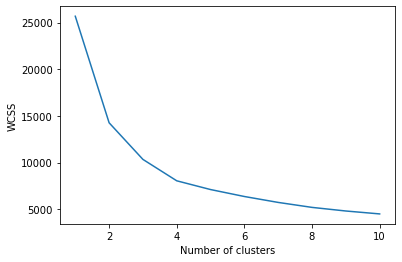

In [149]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

# Kmeans

In [12]:
data=pd.read_csv(r'D:\Doubt\orb\Final.csv')

### Pre-training k means model

In [13]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(data)

KMeans()

In [4]:
import pickle

In [14]:
# save the model to disk
filename = 'Kmeans_CL_10_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [83]:
hist=np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8])
print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([114186, 148695, 138096, 111638, 147121, 123043, 121674, 121235],
      dtype=int64), array([0, 1, 2, 3, 4, 5, 6, 7, 8])) 



### Performing kmeans prediction of the entire Bus dataset with the pretrained kmeans model

In [87]:
#initialising i=0; as its the first class
i=0
data=[]
#k=0

for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist=cv2.equalizeHist(gray)#histogram equalisation
    
    #initialize orb descriptor
    orb=cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(hist,None)
    
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    #k=k+1
    normal = preprocessing.normalize(data) #normalization
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(normal)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('D:\Doubt\Orb\FinalStr.csv', mode='a',header=False,index=False)

### Performing kmeans prediction of the entire Non_Bus dataset with the pretrained kmeans model

In [88]:
#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder2):
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    resize=(280,430)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist=cv2.equalizeHist(gray)#histogram equalisation
    #sift = cv2.xfeatures2d.SIFT_create()
    #keypoints, descriptors = sift.detectAndCompute(gray, None)
    
    orb=cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(hist,None)
    #normal = preprocessing.normalize(descriptors) #normalization
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float' but got 'double', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8])
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    normal = preprocessing.normalize(data) #normalization
    k=k+1
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(normal)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('D:\Doubt\Orb\FinalNstr.csv', mode='a',header=False,index=False)

#### Displaying the kmeans predicted data

In [89]:
print("Bus images")
dat1= pd.read_csv(r'D:\Doubt\Orb\FinalStr.csv',header=None)
print(dat1)

Bus images
             0         1         2         3         4         5         6  \
0     0.192879  0.330650  0.380248  0.165325  0.281053  0.358204  0.529040   
1     0.322584  0.312008  0.296143  0.074036  0.592286  0.391332  0.370179   
2     0.364713  0.226564  0.530492  0.303928  0.165779  0.331558  0.270772   
3     0.192879  0.330650  0.380248  0.165325  0.281053  0.358204  0.529040   
4     0.249423  0.299308  0.426791  0.382449  0.515475  0.360278  0.282680   
...        ...       ...       ...       ...       ...       ...       ...   
3023  0.295225  0.311935  0.484614  0.183819  0.339787  0.490184  0.306365   
3024  0.257159  0.645520  0.325384  0.152196  0.372617  0.320136  0.309640   
3025  0.290177  0.334820  0.440846  0.228793  0.340400  0.340400  0.340400   
3026  0.349214  0.404645  0.382473  0.160749  0.227266  0.332585  0.410188   
3027  0.235558  0.367701  0.482607  0.310247  0.402173  0.338974  0.327483   

             7  8  
0     0.440867  0  
1     0.2538

In [90]:
print("Non-Bus images")
dat2= pd.read_csv(r'D:\Doubt\Orb\FinalNstr.csv',header=None)
print(dat2)

Non-Bus images
             0         1         2         3         4         5         6  \
0     0.384749  0.228619  0.496271  0.156130  0.256499  0.485118  0.440510   
1     0.124856  0.110167  0.235023  0.940091  0.069772  0.077117  0.088134   
2     0.178916  0.427411  0.144127  0.129217  0.670936  0.417472  0.318074   
3     0.103001  0.038625  0.135189  0.968853  0.028969  0.119095  0.099782   
4     0.107172  0.127019  0.265946  0.916919  0.083356  0.103203  0.170682   
...        ...       ...       ...       ...       ...       ...       ...   
2995  0.225121  0.450242  0.434162  0.128641  0.509202  0.284081  0.375202   
2996  0.206715  0.269356  0.363317  0.400901  0.187923  0.494863  0.407166   
2997  0.199467  0.442063  0.199467  0.070083  0.679267  0.264160  0.398935   
2998  0.315709  0.323226  0.180405  0.496114  0.435979  0.240540  0.405912   
2999  0.101107  0.397688  0.330283  0.296581  0.532497  0.363985  0.343764   

             7  8  
0     0.184010  1  
1     0.

#### Appending All classes into 1 csv file

In [91]:
A=dat1.append(dat2)
csv_data=A.to_csv('D:/Doubt/FinalFV.csv', mode='a',header=False,index=False)

In [92]:
A

,0,1,2,3,4,5,6,7,8
0,0.192879,0.330650,0.380248,0.165325,0.281053,0.358204,0.529040,0.440867,0
1,0.322584,0.312008,0.296143,0.074036,0.592286,0.391332,0.370179,0.253837,0
2,0.364713,0.226564,0.530492,0.303928,0.165779,0.331558,0.270772,0.480758,0
3,0.192879,0.330650,0.380248,0.165325,0.281053,0.358204,0.529040,0.440867,0
4,0.249423,0.299308,0.426791,0.382449,0.515475,0.360278,0.282680,0.210624,0
...,...,...,...,...,...,...,...,...,...
2995,0.225121,0.450242,0.434162,0.128641,0.509202,0.284081,0.375202,0.246561,1
2996,0.206715,0.269356,0.363317,0.400901,0.187923,0.494863,0.407166,0.382109,1
2997,0.199467,0.442063,0.199467,0.070083,0.679267,0.264160,0.398935,0.172512,1
2998,0.315709,0.323226,0.180405,0.496114,0.435979,0.240540,0.405912,0.323226,1


In [93]:
A=pd.read_csv(r'D:/Doubt/FinalFV.csv',header=None)

In [94]:
x = A.iloc[:,0:8].values

In [95]:
x

array([[0.19287919, 0.33065004, 0.38024754, ..., 0.35820421, 0.52904006,
        0.44086671],
       [0.3225843 , 0.31200776, 0.29614296, ..., 0.39133177, 0.3701787 ,
        0.25383683],
       [0.36471325, 0.22656429, 0.530492  , ..., 0.3315575 , 0.27077196,
        0.48075838],
       ...,
       [0.19946744, 0.44206297, 0.19946744, ..., 0.26415958, 0.39893488,
        0.17251238],
       [0.31570917, 0.32322605, 0.18040524, ..., 0.24054032, 0.40591179,
        0.32322605],
       [0.101107  , 0.39768755, 0.33028288, ..., 0.36398521, 0.34376381,
        0.31680194]])

In [96]:
y = A.iloc[:,8].values

In [97]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [98]:
from sklearn.preprocessing import StandardScaler
DhoniS = StandardScaler()
Dhoni = DhoniS.fit_transform(x)

In [99]:
Dhoni

array([[-0.95900923, -0.31968945,  0.31443325, ...,  0.45125881,
         2.18709319,  1.13037718],
       [ 0.3495309 , -0.45476633, -0.4744952 , ...,  0.77374088,
         0.62091136, -0.45236384],
       [ 0.77455214, -1.07386672,  1.72377544, ...,  0.19186506,
        -0.35911954,  1.46796051],
       ...,
       [-0.89254315,  0.48757869, -1.38134324, ..., -0.46422362,
         0.90441262, -1.14057222],
       [ 0.28017062, -0.37348162, -1.5601529 , ..., -0.69414658,
         0.97319659,  0.13484272],
       [-1.88486007,  0.16604631, -0.15425164, ...,  0.50753432,
         0.36049229,  0.08047867]])

In [100]:
from sklearn.decomposition import PCA

In [101]:
pca = PCA(n_components=None)
pca.fit(Dhoni)

PCA()

In [102]:
Bhumi = pca.transform(Dhoni)

In [103]:
Bhumi

array([[-0.89290567, -0.61140346,  2.262042  , ...,  0.3307685 ,
         0.41035266, -0.17597497],
       [-1.11495502,  0.90649959,  0.40831412, ...,  0.00744196,
        -1.25698303, -0.08995895],
       [-0.06476108, -2.95691321, -0.11715376, ..., -0.11333396,
        -0.00470442,  0.02808005],
       ...,
       [-0.45546501,  2.8632518 ,  0.36961393, ...,  0.54384013,
        -0.83696822, -0.22345147],
       [ 0.58069864,  0.76981468,  0.87005313, ...,  1.55654176,
        -0.05799397,  0.65775749],
       [-0.04385559,  1.19779919,  1.02437032, ..., -0.55311006,
        -0.67131156,  0.41374961]])

In [104]:
Bhumi = pd.DataFrame(Bhumi)

In [105]:
Bhumi

,0,1,2,3,4,5,6,7
0,-0.892906,-0.611403,2.262042,1.119317,-0.085659,0.330768,0.410353,-0.175975
1,-1.114955,0.906500,0.408314,-0.485360,0.569118,0.007442,-1.256983,-0.089959
2,-0.064761,-2.956913,-0.117154,0.218586,-0.177505,-0.113334,-0.004704,0.028080
3,-0.892906,-0.611403,2.262042,1.119317,-0.085659,0.330768,0.410353,-0.175975
4,0.208902,0.262805,-0.096358,0.297002,0.362423,-1.061608,-1.133113,0.583973
...,...,...,...,...,...,...,...,...
6023,-0.693549,0.797087,-0.110815,1.340112,0.318655,-0.404350,-0.239400,0.061774
6024,-0.064585,-1.081747,2.248096,-0.319895,-0.370890,-0.979537,0.288349,0.149043
6025,-0.455465,2.863252,0.369614,0.448083,0.356441,0.543840,-0.836968,-0.223451
6026,0.580699,0.769815,0.870053,-0.502972,0.558622,1.556542,-0.057994,0.657757


In [106]:
Bhumi.shape

(6028, 8)

In [107]:
print(pca.explained_variance_ratio_) 

[0.43635175 0.24133813 0.10581582 0.06551738 0.05774811 0.04985642
 0.03610016 0.00727224]


In [108]:
pca = PCA(n_components=3)
pca.fit(Dhoni)

PCA(n_components=3)

### Saving the model to disk

In [109]:
filename = 'PCA_12_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [110]:
Bhumi = pca.transform(Dhoni)

In [111]:
Bhumi

array([[-0.89290567, -0.61140346,  2.262042  ],
       [-1.11495502,  0.90649959,  0.40831412],
       [-0.06476108, -2.95691321, -0.11715376],
       ...,
       [-0.45546501,  2.8632518 ,  0.36961393],
       [ 0.58069864,  0.76981468,  0.87005313],
       [-0.04385559,  1.19779919,  1.02437032]])

In [112]:
Bhumi.shape

(6028, 3)

In [113]:
print(pca.explained_variance_ratio_) 

[0.43635175 0.24133813 0.10581582]


In [114]:
Bhumi = pd.DataFrame(Bhumi)

In [115]:
Bhumi

,0,1,2
0,-0.892906,-0.611403,2.262042
1,-1.114955,0.906500,0.408314
2,-0.064761,-2.956913,-0.117154
3,-0.892906,-0.611403,2.262042
4,0.208902,0.262805,-0.096358
...,...,...,...
6023,-0.693549,0.797087,-0.110815
6024,-0.064585,-1.081747,2.248096
6025,-0.455465,2.863252,0.369614
6026,0.580699,0.769815,0.870053


In [116]:
B=pd.concat([Bhumi, pd.DataFrame(y)],axis=1)

In [117]:
B

,0,1,2,0
0,-0.892906,-0.611403,2.262042,0
1,-1.114955,0.906500,0.408314,0
2,-0.064761,-2.956913,-0.117154,0
3,-0.892906,-0.611403,2.262042,0
4,0.208902,0.262805,-0.096358,0
...,...,...,...,...
6023,-0.693549,0.797087,-0.110815,1
6024,-0.064585,-1.081747,2.248096,1
6025,-0.455465,2.863252,0.369614,1
6026,0.580699,0.769815,0.870053,1


In [118]:
csv_data=B.to_csv('D:/Doubt/FinalPCAFV.csv', mode='a',header=False,index=False)

# Training ,Testing & Classification

In [119]:
data= pd.read_csv(r'D:/PROJECT/FinalPCAFV.csv',header=None)
data

,0,1,2,3
0,-0.710255,-1.776754,1.201367,0
1,-0.033391,-0.249004,0.080151,0
2,-0.865557,0.764308,0.643369,0
3,-0.710255,-1.776754,1.201367,0
4,1.024434,-0.093380,-0.882437,0
...,...,...,...,...
6028,-0.477738,-0.826945,-1.163746,1
6029,0.968638,-0.865397,0.831663,1
6030,0.585486,-1.869927,-0.324981,1
6031,1.846085,-0.172150,1.182303,1


In [120]:
#assigning x the columns from 1 to 128 for training
x = data.iloc[:,0:3].values
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = data.iloc[:,3]
print("Y values")
print(y)

X values
[[-0.71025486 -1.77675359  1.2013671 ]
 [-0.03339132 -0.24900379  0.08015128]
 [-0.86555705  0.7643079   0.6433692 ]
 ...
 [ 0.58548554 -1.86992713 -0.32498069]
 [ 1.84608495 -0.17214958  1.1823028 ]
 [ 1.5957457  -0.91864563  0.16745719]]
Y values
0       0
1       0
2       0
3       0
4       0
       ..
6028    1
6029    1
6030    1
6031    1
6032    1
Name: 3, Length: 6033, dtype: int64


### Dataset split into train and test with 70% Training and 30% Testing

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=0)

In [122]:
from sklearn.metrics import accuracy_score
#Assign model with Decision Tree classifier
model1 = DecisionTreeClassifier(max_depth=13)
filename = 'model1.sav'
pickle.dump(kmeans, open(filename, 'wb'))
#training the model with the Training Variables 
model1.fit(x_train, y_train)
#predicting the traget variable using testing variables
y_pred1 = model1.predict(x_test)
#Results
print("Decision Tree Results")
print("Decision Tree Testing Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")

Decision Tree Results
Decision Tree Testing Accuracy:  83.8121546961326 %


In [124]:
#Recognition &Validation
#Assigning path with any any class image

data=[]
path=r"D:\Bus-2\Bus (236).jpg"
#Repeated the process of image pre-processing and feature extraction

a=cv2.imread(path)
resize=(280,430)

#resize image
img=cv2.resize(a,resize)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist=cv2.equalizeHist(gray)#histogram equalisation

orb=cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(hist,None)

#convert the descriptor array into a dataframe format
out=pd.DataFrame(descriptors)
print("Descriptor Shape:",out.shape)

#initialise Kmeans and create 5 clusters


#train the model for the features i.e. for all elements in the Dataframe
array_double = np.array(out, dtype=np.double)
a=kmeans.predict(array_double)

#get the values of the histogram for one image only for 5 clusters i.e. in 5 bins
#kmeans.labels_ give us the label vlaue of the feature that its clustered into
#hist will give the hostogram for all those vlaues
hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8])

#append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
data.append(hist[0])

Output = pd.DataFrame(data)
print("Histogram:\n",Output) # eg in 4th big we have 87 keypoint

Descriptor Shape: (500, 32)
Histogram:
     0   1   2   3   4   5    6   7
0  23  36  54  81  39  94  108  65


In [125]:
from sklearn.preprocessing import StandardScaler
MuktaS = StandardScaler()
Mukta = MuktaS.fit_transform(Output)

In [126]:
Mukta

array([[0., 0., 0., 0., 0., 0., 0., 0.]])

In [127]:
Mukta.shape

(1, 8)

In [128]:
MB = pca.transform(Mukta)

In [129]:
MB.shape

(1, 3)

In [130]:
MB

array([[-1.24335580e-16,  6.15964929e-17,  5.87197467e-16]])

In [131]:
#prediction
y_pred1 = model1.predict(MB)

#prints the prediction of the class
print(y_pred1) 

[0]


### Kernel RBF

In [132]:
from sklearn.svm import SVC
DhoniSVM_LK = SVC(kernel='rbf',decision_function_shape='ovr')
Dhoni_LK = DhoniSVM_LK.fit(x_train, y_train)

In [133]:
filename = 'SVC_RBF_PCA_6.sav'
pickle.dump(Dhoni_LK, open(filename, 'wb'))

In [134]:
Dhoni_LK

SVC()

In [135]:
y_pred_LK = Dhoni_LK.predict(x_test)

In [136]:
y_pred_LK

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [137]:
from sklearn.metrics import confusion_matrix

In [138]:
confusion_matrix(y_test, y_pred_LK)

array([[841,  86],
       [444, 439]], dtype=int64)

# Precision Score, Recall Score, Accuracy, f1 Score

In [86]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [115]:
print('Precision: %.3f' % precision_score(y_test, y_pred_LK))

Precision: 0.841


In [112]:
print('Recall: %.3f' % recall_score(y_test, y_pred_LK,average='macro'))

Recall: 0.689


In [113]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred_LK,average = 'macro'))

F1 Score: 0.675


In [91]:
from sklearn.metrics import accuracy_score

In [139]:
print("Accuracy of testing data: ",accuracy_score(y_test, y_pred_LK))

Accuracy of testing data:  0.7071823204419889


In [140]:
y_pred1 = model1.predict(MB)

#prints the prediction of the class
print(y_pred1)

[0]


### Kernel Linear

In [141]:
from sklearn.svm import SVC
DhoniSVM_LK = SVC(kernel='linear')
Dhoni_LK = DhoniSVM_LK.fit(x_train, y_train)

In [142]:
y_pred_LK = Dhoni_LK.predict(x_test)
accuracy_score(y_test, y_pred_LK)

0.6950276243093922

### Kernel Poly

In [143]:
from sklearn.svm import SVC
DhoniSVM_LK = SVC(kernel='poly',degree=1,C=1)
Dhoni_LK = DhoniSVM_LK.fit(x_train, y_train)

In [144]:
y_pred_LK = Dhoni_LK.predict(x_test)
accuracy_score(y_test, y_pred_LK)

0.6944751381215469

# Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

#
y_pred=logreg.predict(x_test)
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred))

Testing Accuracy: 0.6856353591160221


# KNN

In [146]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train )
ypred = model.predict(x_test)
print("Testing Accuracy:",metrics.accuracy_score(y_test, ypred ))

Testing Accuracy: 0.8248618784530387


# Random Forest


In [147]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9370165745856354


# EasyOCR

In [1]:
import imutils
import easyocr

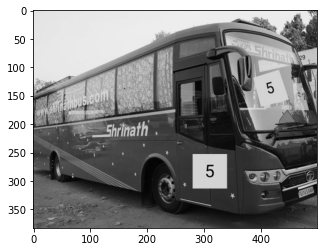

In [4]:
img = cv2.imread(r"D:\\Final Dataset\Numbered Bus\35.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

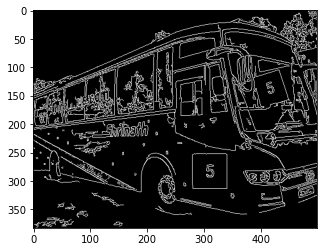

In [5]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [6]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [7]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [8]:
location

array([[[280, 254]],

       [[281, 313]],

       [[341, 313]],

       [[341, 253]]], dtype=int32)

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

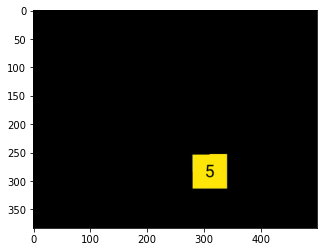

In [10]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [11]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1-3:x2+5, y1-3:y2+5]

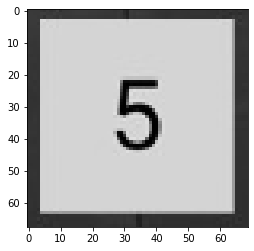

In [12]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [13]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[25, 19], [45, 19], [45, 47], [25, 47]], '5', 0.9999997615814351)]

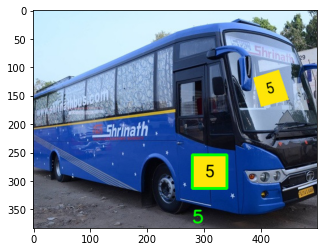

In [14]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [15]:
text

'5'

In [16]:
if text=='5':
    print("Wanowrie to Bibewadi")
if text=='4':
    print("Koregaon Park to MG Road")
if text=='3':
    print("Kondhwa to Fatima Nagar")
if text=='2':
    print("Salunke Vihar to Hadapsar")
if text=='1':
    print("Kalyani Nagar to Lohegaon")


Wanowrie to Bibewadi


# End